<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #08306B;">ML Project |</span> <span style="color: #08529C;">To Grant or Not to Grant</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>João Henriques, 20240499</div>
            <div>Simone Genovese, 20241459</div>
            <div>Steven Carlson, 20240554</div>
            <div>Vinícius Pinto, 20211682</div>
            <div>Zofia Wojcik, 20240654</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            TBL Group 33
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

##### **Notebook Structure**

<ol style="list-style-type: upper-roman;font-weight: bold;">
      <li><span style="font-weight: normal;"><a href="#DP_FeatureEng">Feature Engineering</a></span></li>
      <ol style="list-style-type:decimal;">
        <li><span style="font-weight: normal;"><a href="#1-outliers">Outliers</a></span></li>
        <li><span style="font-weight: normal;"><a href="#2-missing-values">Missing Values</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#categorical-variables-aproach">Categorical Variables Approach</a></span></li>
          <li><span style="font-weight: normal;"><a href="#fill-missing-values-with-central-tendency-measures">Fill Missing Values with Central Tendency Measures</a></span></li>
          <li><span style="font-weight: normal;"><a href="#knn-imputer">KNN Imputer</a></span></li>
        </ol>
        <li><span style="font-weight: normal;"><a href="#3-encoding">Categorical Variables (Encoding)</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#target-encoding">Target Encoding</a></span></li>
          <li><span style="font-weight: normal;"><a href="#label-ordinal-encoding">Label/Ordinal Encoding</a></span></li>
          <li><span style="font-weight: normal;"><a href="#one-hot-encoding">One-Hot Encoding</a></span></li>
        </ol>
        <li><span style="font-weight: normal;"><a href="#4-multicollinearity">Multicollinearity</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#variance-inflation-factor-vif">Variance Inflation Factor (VIF)</a></span></li>
        </ol>
      </ol>
      <li><span style="font-weight: normal;"><a href="#🎚️-feature-selection">Feature Selection</a></span></li>
      <ol style="list-style-type:decimal;">
        <li><span style="font-weight: normal;"><a href="#filter-methods">Filter Methods</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#correlation-coefficient">Spearman Correlations</a></span></li>
          <li><span style="font-weight: normal;"><a href="#chi-square-test">Chi-Square Test</a></span></li>
        </ol>
        <li><span style="font-weight: normal;"><a href="#wrapper-methods">Wrapper Methods</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#rfe">RFE (Recursive Feature Elimination)</a></span></li>
      </ol>
      <li><span style="font-weight: normal;"><a href="#embedded-methods">Embedded Methods</a></span></li>
      <ol style="list-style-type:lower-alpha;">
        <li><span style="font-weight: normal;"><a href="#ridge-regression-l2-regularization">Ridge Regression</a></span></li>
        <li><span style="font-weight: normal;"><a href="#lasso-regression-least-absolute-shrinkage-and-selection-operator">Lasso Regression</a></span></li>
      </ol>
    </ol>  
  </li>
</ol>

<br>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## **📚 Libraries Import**

In [62]:
# For data
import pandas as pd
import numpy as np

import os

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import matplotlib.colors as mcolors


# For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Wrapper methods - Recursive Feature Elimination (RFE)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.feature_selection import RFE
from tqdm import tqdm                         # For progress bar

# Embedded methods
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model

# Set the style of the visualization
pd.set_option('display.max_columns', None) # display all columns

# Disable FutureWarnings
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set_theme(style="white")

## **🧮 Import Databases**

In [63]:
# Importing the dataset
train_data = pd.read_parquet('data/1stNotebook/train_data_cleaned.parquet')
test_data = pd.read_parquet('data/1stNotebook/test_data_cleaned.parquet')

In [64]:
# Display the first 2 rows of each dataset
# train_data.head(2) 

In [65]:
# test_data.head(2)

# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#08529C, #08306B); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>2 | Data Preparation</b></h1></center>
</div>

<br><br>

In [66]:
# Palette of colors | Blues
palette = ['#002147', '#084594', '#135C9B', '#2171B5', '#4292C6', '#6BAED6', '#9ECAE1', '#C6DBEF', '#DEEBF7', '#F7FBFF']

# Dictionary Palette of colors for 'Claim Injury Type'
claim_injury_type_palette = dict(zip(sorted(train_data["Claim Injury Type"].unique()), palette))
claim_injury_type_palette

{'1. CANCELLED': '#002147',
 '2. NON-COMP': '#084594',
 '3. MED ONLY': '#135C9B',
 '4. TEMPORARY': '#2171B5',
 '5. PPD SCH LOSS': '#4292C6',
 '6. PPD NSL': '#6BAED6',
 '7. PTD': '#9ECAE1',
 '8. DEATH': '#C6DBEF'}

### **🛠️ Drop Columns Unnecessary for the Model**

In [67]:
# Sort columns alphabetically
train_data = train_data.reindex(sorted(train_data.columns), axis=1)
test_data = test_data.reindex(sorted(test_data.columns), axis=1)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 5393875 to 6165075
Data columns (total 62 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570337 non-null  datetime64[ns]
 1   Accident Date Binary               574026 non-null  int32         
 2   Accident Date Day                  570337 non-null  float64       
 3   Accident Date Month                570337 non-null  float64       
 4   Accident Date Weekday              570337 non-null  float64       
 5   Accident Date Year                 570337 non-null  float64       
 6   Age at Injury                      574026 non-null  int64         
 7   Age at Injury Clean                571840 non-null  float64       
 8   Age at Injury Group                574026 non-null  object        
 9   Alternative Dispute Resolution     574026 non-null  object        
 10  Assembly Date     

In [68]:
# Transform the 'Assembly Date Day', 'Assembly Date Month', 'Assembly Date Year' and 'Assembly Date Weekday' columns to 'int64' type 
# [Just to be more easy to be treated like other date columns]
train_data['Assembly Date Day'] = train_data['Assembly Date Day'].astype('int64')
train_data['Assembly Date Month'] = train_data['Assembly Date Month'].astype('int64')
train_data['Assembly Date Year'] = train_data['Assembly Date Year'].astype('int64')
train_data['Assembly Date Weekday'] = train_data['Assembly Date Weekday'].astype('int64')

test_data['Assembly Date Day'] = test_data['Assembly Date Day'].astype('int64')
test_data['Assembly Date Month'] = test_data['Assembly Date Month'].astype('int64')
test_data['Assembly Date Year'] = test_data['Assembly Date Year'].astype('int64')
test_data['Assembly Date Weekday'] = test_data['Assembly Date Weekday'].astype('int64')

In [69]:
# Drop the Dates columns
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date'] # Because we have all extracted columns from it

# Drop the columns based on Correlation Analysis [1st Notebook]
columns_to_drop = ['Age at Injury',    # Because we have Age at Injury Cleaned
                   'Birth Year',       # Because we have Age at Injury Cleaned [It's redundant]
                   'Birth Year Clean', # Because we have Age at Injury Cleaned [It's redundant]
                   'Average Weekly Wage', # Because we create a new column from it ['Weekly Wage Reported']
                   'Carrier Name',     # Because we don't know how to treat text for now
                   'Carrier Type',     # Because we create a new column from it ['Carrier Type Bucket']
                   'IME-4 Count',      # Because we create a new column from it ['IME-4 Reported']
                   'Industry Code Description',  # Because we have 'Industry Code'
                   'County of Injury',           # Because we have 'Medical Fee Region' [It's redundant]
                   'Zip Code',          # Because we have 'Medical Fee Region' [It's redundant]
                   'WCIO Cause of Injury Description',  # Because we have 'WCIO Cause of Injury Bucket'
                   # 'WCIO Cause of Injury Code',         # Because we have 'WCIO Cause of Injury Bucket'
                   'WCIO Part Of Body Description',     # Because we have 'WCIO Part of Body Bucket'
                   # 'WCIO Part Of Body Code',            # Because we have 'WCIO Part of Body Bucket'
                   'WCIO Nature of Injury Description', # Because we have 'WCIO Nature of Injury Bucket'
                   # 'WCIO Nature of Injury Code',        # Because we have 'WCIO Nature of Injury Bucket'

                   # Dates columns that we don't need after creating binary columns (because they have a lot of missing values >70%)
                   'C-3 Date Year', 'C-3 Date Month', 'C-3 Date Day', 'C-3 Date Weekday',
                   'First Hearing Date Year', 'First Hearing Date Month', 'First Hearing Date Day', 'First Hearing Date Weekday'
]

train_data = train_data.drop(columns = date_columns + columns_to_drop)
test_data = test_data.drop(columns = date_columns + columns_to_drop)

In [70]:
# Show the columns of the training set (train_data) that have missing values and are 'object' type
train_data.select_dtypes(include = 'object').columns[train_data.select_dtypes(include = 'object').isnull().any()]

Index([], dtype='object')

> Since our approach to the **`NA's`** of categorical variables is to replace them with a new category, it is confirmed that no variable currently has **`NA's`**.

In [71]:
# Show the columns of the training set 'object' type
train_data.select_dtypes(include = 'object').columns

Index(['Age at Injury Group', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'COVID-19 Indicator', 'Carrier Type Bucket',
       'Claim Injury Type', 'District Name', 'Gender', 'Medical Fee Region',
       'WCIO Cause of Injury Bucket', 'WCIO Nature of Injury Bucket',
       'WCIO Part of Body Bucket'],
      dtype='object')

> For **`object`** type variables, we will use some **Enconding** techniques to transform them into **numerical** variables, since the model does not accept **`object`** type variables.

---

### ⚖️ **Training/Validation Division**

> Before starting the feature engineering process that will be carried out in the next steps, we will divide the training data into training and validation sets. This will allow us to evaluate the performance of the models we will develop.

In [72]:
# Splitting the data into training and validation sets
X = train_data.drop(columns = ['Claim Injury Type'])
y = train_data['Claim Injury Type']
X_train, X_val, y_train, y_val = train_test_split(X,y,                 # X and y
                                                  test_size = 0.25,    # 75% train, 25% validation
                                                  random_state = 2024, # Seed
                                                  stratify = y,        # Keep the same proportion of target classes (because of imbalance)
                                                  shuffle = True)      # Shuffle the data

In [73]:
# Check the shape of the training and validation sets
X_train.shape, X_val.shape

((430519, 35), (143507, 35))

In [74]:
# Check the unique values of each column
for col in X_train.columns:
    unique_values = sorted(X_train[col].unique(), key=lambda x: (str(type(x)), x))
    # print(f"\033[1m{col}\033[0m [{X_train[col].nunique()}]")
    print(f'\033[1m{col}\033[0m [{X_train[col].nunique()}]: {unique_values}')

Accident Date Binary [2]: [0, 1]
Accident Date Day [31]: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, nan]
Accident Date Month [12]: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, nan]
Accident Date Weekday [7]: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan]
Accident Date Year [59]: [1961.0, 1963.0, 1966.0, 1967.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, nan, 2023.0]
Age at Injury Clean [107]: [16.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 

In [75]:
# Check the columns of the training set (X_train) that are not in the validation set (X_val)
set(X_train.columns) - set(X_val.columns) # Perfect!

set()

In [76]:
# Check the information of the training set
# X_train.info()

In [77]:
# Show the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().any()]

Index(['Accident Date Day', 'Accident Date Month', 'Accident Date Weekday',
       'Accident Date Year', 'Age at Injury Clean', 'C-2 Date Day',
       'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year', 'Industry Code'],
      dtype='object')

> Since we have missing values in the dataset, we will need to use some technique to fill in on next steps.

---

### <a class='anchor' id='DP_FeatureEng'></a> 🛠️ **Feature Engineering**

##### **Most Used Feature Engineering Techniques**

+ **Binning / Bucketizing** ✅
  - Grouping of values into "bins" or "buckets"

1. **Splitting the Data** ✅
    - Training Data
    - Validation Data

2. **Handling Outliers** ✅
 

2. **Handling Missing Values**
    - Drop Missing Values
    - Impute Missing Values (e.g., using some statistical measure, KNN, etc.)

3. **Encoding**
    - Label Encoding using Scikit-learn
    - One-Hot Encoding using Scikit-learn

4. **Multicollinearity**
    - Variance Inflation Factor (VIF)
  
5. **Normalize / Standardize** <sup>*</sup> [We will do it on the next notebook] - [3. Modeling&Evaluation]('/3_Modeling&Evaluation_MLProject_Group33.ipynb')
    - Normalize and Standardize using Scikit-learn

<br>

<sup><b>*</b></sup> **Note:** We will **Normalize / Standardize** the data in the next notebook, since that will create more datasets to work with. It is better to do it after the **Feature Engineering** process.

---

#### **1 | Handling Outlier Values** <a class='anchor' id='1-outliers'></a>

To address outlier values, we considered three primary strategies:

- **Total or partial removal**: This involves removing all outliers or a subset based on a predefined threshold.
- **Adjust values to reduce extremity**: Known as "winsorizing," this approach modifies extreme values to bring them closer to the general range, based on a threshold established a priori.
- **Retain all values**: This approach keeps all data points, preserving the full range of variability.

We chose to retain all outlier values to maintain data integrity and avoid introducing potential biases. Removing outliers risks eliminating natural variability, potentially distorting the data's inherent distribution. Additionally, the process of outlier removal can be subjective, introducing bias by making arbitrary decisions on which data points to exclude. Keeping all data points avoids arbitrary decisions that could affect the analysis.


Although we did not remove outliers directly, two preprocessing steps implemented throughout the project helped mitigate their impact:

- **Feature transformation**: By applying transformations such as log transformations -  extremely high or low values are compressed, reducing their influence on the model.
- **Creation of new features**: New features, such as ‘Weekly Wage Reported’ and ‘IME-4 Reported,’ helped manage outliers by focusing on binary indicators rather than raw values. This approach simplifies complex variables, reducing the impact of extreme values and enhancing the model's robustness against variability.

In [78]:
# Define function for outlier detection, based on IQR method
def detect_outliers(df,features, dfoutput=False, info=True):
    """
    Detect outliers in the DataFrame based on the InterQuartile Range (IQR) method.

    Args:
        df (pd.DataFrame): The DataFrame to detect the outliers.
        features (list): The list of features to detect the outliers.
        dfoutput (bool, optional): Boolean to return the DataFrame with the outliers. Defaults to False.
        info (bool, optional): Boolean to print the information about the outliers. Defaults to True.

    Returns:
        pd.DataFrame: DataFrame with the outliers (if dfoutput=True).
        pd.DataFrame: Information about the outliers (if info=True and dfoutput=False or info=True and dfoutput=True).
    """
    # Check if features is a list
    if not isinstance(features, list):
        features = [features]
    
    if len(features) == 0:
        return []
    
    # Detect outliers in 1 features
    for feature in features:
        Q1 = df[feature].quantile(0.25)       # 1st quartile
        Q3 = df[feature].quantile(0.75)       # 3rd quartile
        IQR = Q3 - Q1                         # InterQuartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        
        # Print the information about the outliers
        if info:
            # print('\033[1m', feature, '\033[0m',
            #         '\n  1st Quartile:', Q1, '  | 3rd Quartile:', Q3, '  | IQR:', IQR,
            #         '\n  Lower Bound:', lower_bound, '  | Upper Bound:', upper_bound,
            #         '\n\n  Number of outliers:', len(outliers), '(', round(len(outliers)/len(df)*100, 2), '%)',
            #         '\n    Min:', outliers[feature].min(), '  | Max:', outliers[feature].max(), '\n')
            
            # Save the information that are printed in a DataFrame format
            outliers_info = pd.DataFrame({
                'Feature': feature,
                '1st Quartile': Q1,
                '3rd Quartile': Q3,
                'IQR': IQR,
                'Lower Bound': lower_bound,
                'Upper Bound': upper_bound,
                'Number of Outliers': len(outliers),
                'Percentage of Outliers (%)': round(len(outliers)/len(df)*100, 2),
                'Min': outliers[feature].min(),
                'Max': outliers[feature].max()
            }, index=[0])
            
            # Return the DataFrame with the information about the outliers
            return outliers_info
            
        # Return DataFrame with the outliers and the information about the outliers
        if dfoutput:
            return outliers_info, outliers

# Apply the function 'detect_outliers' to all the metric columns [Train Data]
for col in train_data.select_dtypes(['float64', 'int64']).columns:
    # If it is the first column, save the information about the outliers
    if col == train_data.select_dtypes(['float64', 'int64']).columns[0]:
        outliers_info = detect_outliers(train_data, col, info=True)
    else:
        # Combine the information about the outliers of all the columns in a single DataFrame
        outliers_info = pd.concat([outliers_info, detect_outliers(train_data, col, info=True)], ignore_index=True)
    
outliers_info.set_index('Feature', inplace=True)

# Personalize the DataFrame with a grey color for the rows without outliers
def highlight_no_outliers(row):
    # Check if the "Number of Outliers" column is zero
    if row['Number of Outliers'] > 0:
        return ['background-color: #DEEBF7'] * len(row)
    return [''] * len(row)

# Apply styling to the DataFrame
outliers_info.style.format({
    col: '{:.2f}' for col in outliers_info.select_dtypes('float64').columns
}).apply(highlight_no_outliers, axis=1)

,1st Quartile,3rd Quartile,IQR,Lower Bound,Upper Bound,Number of Outliers,Percentage of Outliers (%),Min,Max
Feature,,,,,,,,,
Accident Date Day,8.00,23.00,15.00,-14.50,45.50,0,0.00,nan,nan
Accident Date Month,3.00,9.00,6.00,-6.00,18.00,0,0.00,nan,nan
Accident Date Weekday,1.00,4.00,3.00,-3.50,8.50,0,0.00,nan,nan
Accident Date Year,2020.00,2022.00,2.00,2017.00,2025.00,4865,0.85,1961.00,2016.00
Age at Injury Clean,31.00,54.00,23.00,-3.50,88.50,290,0.05,89.00,122.00
Assembly Date Day,8.00,23.00,15.00,-14.50,45.50,0,0.00,nan,nan
Assembly Date Month,3.00,9.00,6.00,-6.00,18.00,0,0.00,nan,nan
Assembly Date Weekday,1.00,3.00,2.00,-2.00,6.00,0,0.00,nan,nan
Assembly Date Year,2020.00,2022.00,2.00,2017.00,2025.00,0,0.00,nan,nan


In [79]:
# Apply the function 'detect_outliers' to all the metric columns [Test Data]
for col in test_data.select_dtypes(['float64', 'int64']).columns:
    # If it is the first column, save the information about the outliers
    if col == test_data.select_dtypes(['float64', 'int64']).columns[0]:
        outliers_info_test = detect_outliers(test_data, col, info=True)
    else:
        # Combine the information about the outliers of all the columns in a single DataFrame
        outliers_info_test = pd.concat([outliers_info_test, detect_outliers(test_data, col, info=True)], ignore_index=True)
        
outliers_info_test.set_index('Feature', inplace=True)

# Filter the DataFrame to only show the columns that have outliers
outliers_with_values_test = outliers_info_test[outliers_info_test['Number of Outliers'] > 0]

# Apply styling to the filtered DataFrame
outliers_with_values_test.style.format({
    col: '{:.2f}' for col in outliers_with_values_test.select_dtypes('float64').columns
}).apply(highlight_no_outliers, axis=1)

,1st Quartile,3rd Quartile,IQR,Lower Bound,Upper Bound,Number of Outliers,Percentage of Outliers (%),Min,Max
Feature,,,,,,,,,
Accident Date Year,2023.00,2024.00,1.00,2021.50,2025.50,4314,1.11,1966.00,2021.00
Age at Injury Clean,30.00,53.00,23.00,-4.50,87.50,616,0.16,88.00,120.00
C-2 Date Year,2023.00,2024.00,1.00,2021.50,2025.50,536,0.14,1985.00,2021.00


##### **Outliers Detection | Notes:**

Using **IQ Range** to detect outliers(consider as outliers values that are **$1.5 \times IQR$** below the **Q1** or above the **Q3**), we identified the following variables with outliers:

- **`Accident Date Year`** - By virtue of this variable have outliers on both datasets (Train and Test), we will not remove them.
  - So, we will try to logarithmize this variable to reduce the impact of outliers.
- **`C-2 Date Year`** - Once again, the strategy of logarithmize this variable will be used to reduce the impact of outliers.
- **`Age at Injury Clean`** - Since we create a new variable **`Age at Injury Groups`** that groups the ages, we will not need to remove the outliers from this variable, and the new variable will be used in the model.
- **`WCIO Part Of Body Code`** - We will not remove the outliers from this variable, and the new variable **`WCIO Part Of Body Buckets`** will be used in the model.

In [80]:
# Apply LogScaler to the 'Accident Date Year' and 'C-2 Date Year' columns
# Log Transformation - Logarithm of the values in the dataset (Base e - default)
X_train['Accident Date Year_Log'] = np.log(X_train['Accident Date Year'])
X_train['C-2 Date Year_Log'] = np.log(X_train['C-2 Date Year'])

X_val['Accident Date Year_Log'] = np.log(X_val['Accident Date Year'])
X_val['C-2 Date Year_Log'] = np.log(X_val['C-2 Date Year'])

test_data['Accident Date Year_Log'] = np.log(test_data['Accident Date Year'])
test_data['C-2 Date Year_Log'] = np.log(test_data['C-2 Date Year'])

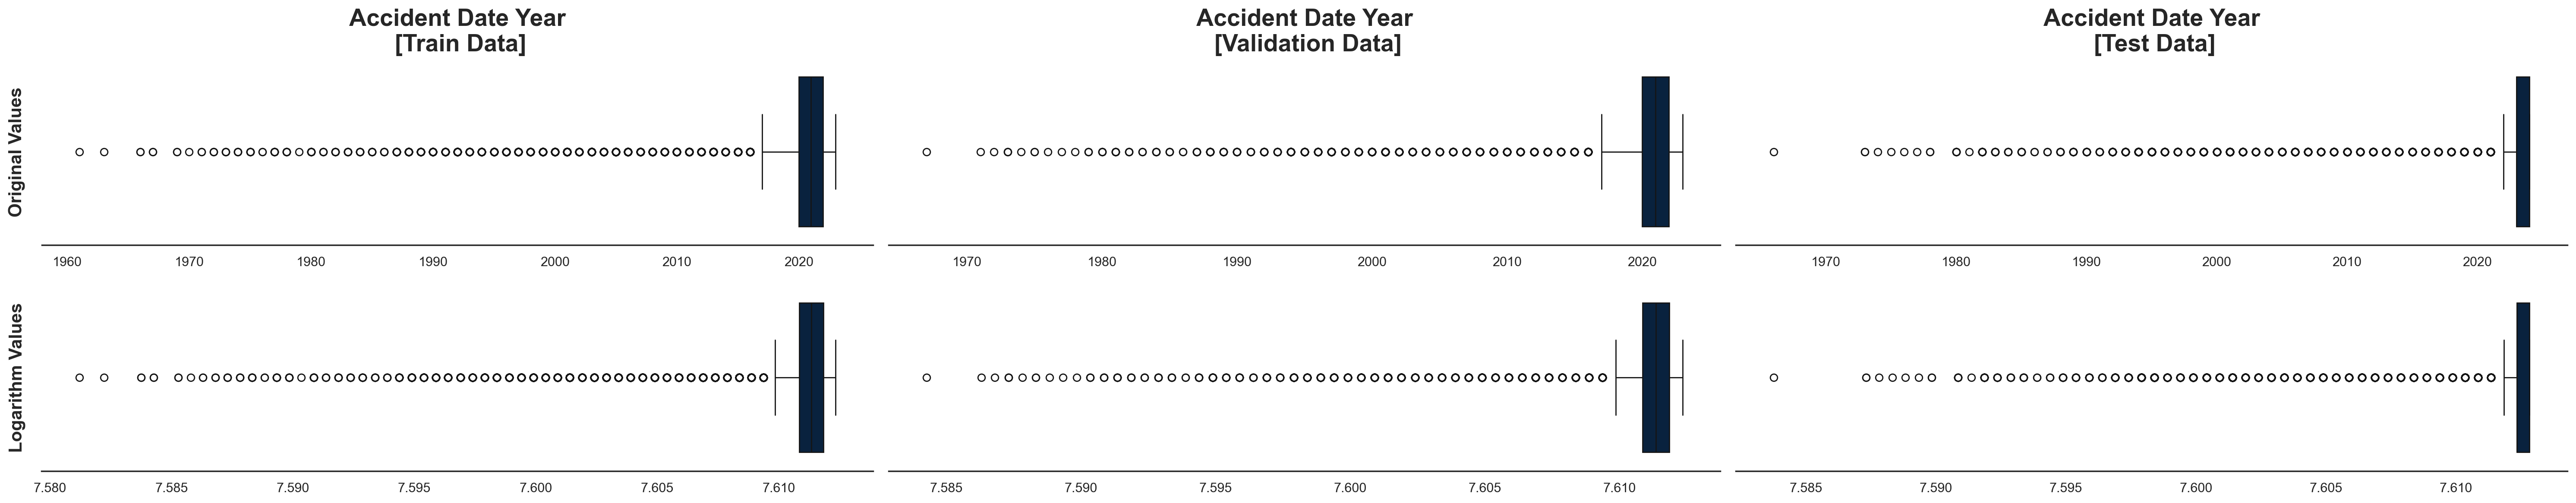

In [81]:
# Boxplots with Original and Logarithm values of 'Accident Date Year' [Train, Validation and Test Data]
fig, ax = plt.subplots(2, 3, figsize=(30, 6))

# Train Data - 'Accident Date Year'
sns.boxplot(x = X_train['Accident Date Year'], ax=ax[0, 0], color=palette[0])
sns.boxplot(x = X_train['Accident Date Year_Log'], ax=ax[1, 0], color=palette[0])
ax[0, 0].set_title('Accident Date Year\n [Train Data]', fontsize=20, fontweight='bold')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('Original Values', fontsize=15, fontweight='bold')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('Logarithm Values', fontsize=15, fontweight='bold')

# Validation Data - 'Accident Date Year'
sns.boxplot(x = X_val['Accident Date Year'], ax=ax[0, 1], color=palette[0])
sns.boxplot(x = X_val['Accident Date Year_Log'], ax=ax[1, 1], color=palette[0])
ax[0, 1].set_title('Accident Date Year\n [Validation Data]', fontsize=20, fontweight='bold')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')

# Test Data - 'Accident Date Year'
sns.boxplot(x = test_data['Accident Date Year'], ax=ax[0, 2], color=palette[0])
sns.boxplot(x = test_data['Accident Date Year_Log'], ax=ax[1, 2], color=palette[0])
ax[0, 2].set_title('Accident Date Year\n [Test Data]', fontsize=20, fontweight='bold')
ax[0, 2].set_xlabel('')
ax[0, 2].set_ylabel('')
ax[1, 2].set_xlabel('')
ax[1, 2].set_ylabel('')

sns.despine(left=True, right=True, top=True)
plt.tight_layout()
plt.show()

In [82]:
# # Plot histograms for 'Accident Date Year' and 'C-2 Date Year' before and after log transformation
# fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# # Train Data - 'Accident Date Year'
# sns.histplot(X_train['Accident Date Year'], bins=30, kde=True, ax=ax[0, 0], color=palette[0])
# sns.histplot(X_train['Accident Date Year_Log'], bins=30, kde=True, ax=ax[1, 0], color=palette[0])
# ax[0, 0].set_title('Accident Date Year\n [Train Data]', fontsize=16, fontweight='bold')
# ax[0, 0].set_xlabel('')
# ax[0, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
# ax[1, 0].set_xlabel('Logarithm Values', fontsize=12, fontweight='bold')
# ax[1, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')

# # Validation Data - 'Accident Date Year'
# sns.histplot(X_val['Accident Date Year'], bins=30, kde=True, ax=ax[0, 1], color=palette[0])
# sns.histplot(X_val['Accident Date Year_Log'], bins=30, kde=True, ax=ax[1, 1], color=palette[0])
# ax[0, 1].set_title('Accident Date Year\n [Validation Data]', fontsize=16, fontweight='bold')
# ax[0, 1].set_xlabel('')
# ax[0, 1].set_ylabel('')
# ax[1, 1].set_xlabel('Logarithm Values', fontsize=12, fontweight='bold')
# ax[1, 1].set_ylabel('')

# # Test Data - 'Accident Date Year'
# sns.histplot(test_data['Accident Date Year'], bins=30, kde=True, ax=ax[0, 2], color=palette[0])
# sns.histplot(test_data['Accident Date Year_Log'], bins=30, kde=True, ax=ax[1, 2], color=palette[0])
# ax[0, 2].set_title('Accident Date Year\n [Test Data]', fontsize=16, fontweight='bold')
# ax[0, 2].set_xlabel('')
# ax[0, 2].set_ylabel('')
# ax[1, 2].set_xlabel('Logarithm Values', fontsize=12, fontweight='bold')
# ax[1, 2].set_ylabel('')

# sns.despine(left=True, right=True, top=True)
# plt.tight_layout()
# plt.show()

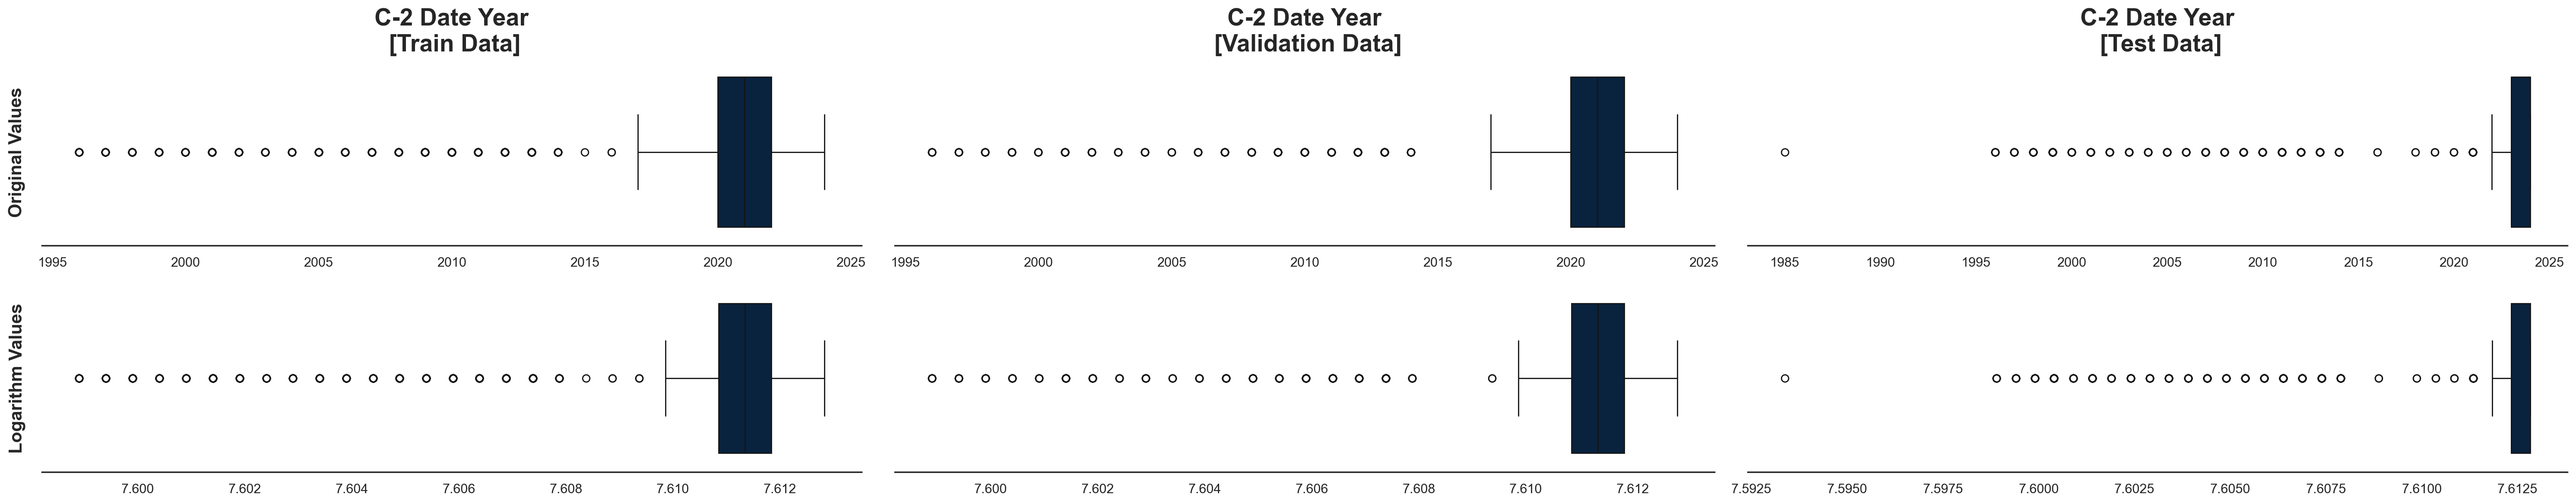

In [83]:
# Boxplots with Original and Logarithm values of 'C-2 Date Year' [Train, Validation and Test Data]
fig, ax = plt.subplots(2, 3, figsize=(30, 6))

# Train Data - 'C-2 Date Year'
sns.boxplot(x = X_train['C-2 Date Year'], ax=ax[0, 0], color=palette[0])
sns.boxplot(x = X_train['C-2 Date Year_Log'], ax=ax[1, 0], color=palette[0])
ax[0, 0].set_title('C-2 Date Year\n [Train Data]', fontsize=20, fontweight='bold')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('Original Values', fontsize=15, fontweight='bold')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('Logarithm Values', fontsize=15, fontweight='bold')

# Validation Data - 'C-2 Date Year'
sns.boxplot(x = X_val['C-2 Date Year'], ax=ax[0, 1], color=palette[0])
sns.boxplot(x = X_val['C-2 Date Year_Log'], ax=ax[1, 1], color=palette[0])
ax[0, 1].set_title('C-2 Date Year\n [Validation Data]', fontsize=20, fontweight='bold')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')

# Test Data - 'C-2 Date Year'
sns.boxplot(x = test_data['C-2 Date Year'], ax=ax[0, 2], color=palette[0])
sns.boxplot(x = test_data['C-2 Date Year_Log'], ax=ax[1, 2], color=palette[0])
ax[0, 2].set_title('C-2 Date Year\n [Test Data]', fontsize=20, fontweight='bold')
ax[0, 2].set_xlabel('')
ax[0, 2].set_ylabel('')
ax[1, 2].set_xlabel('')
ax[1, 2].set_ylabel('')

sns.despine(left=True, right=True, top=True)
plt.tight_layout()
plt.show()

> This strategy doesn't seem to have much effect given the interval of the values of the variables.

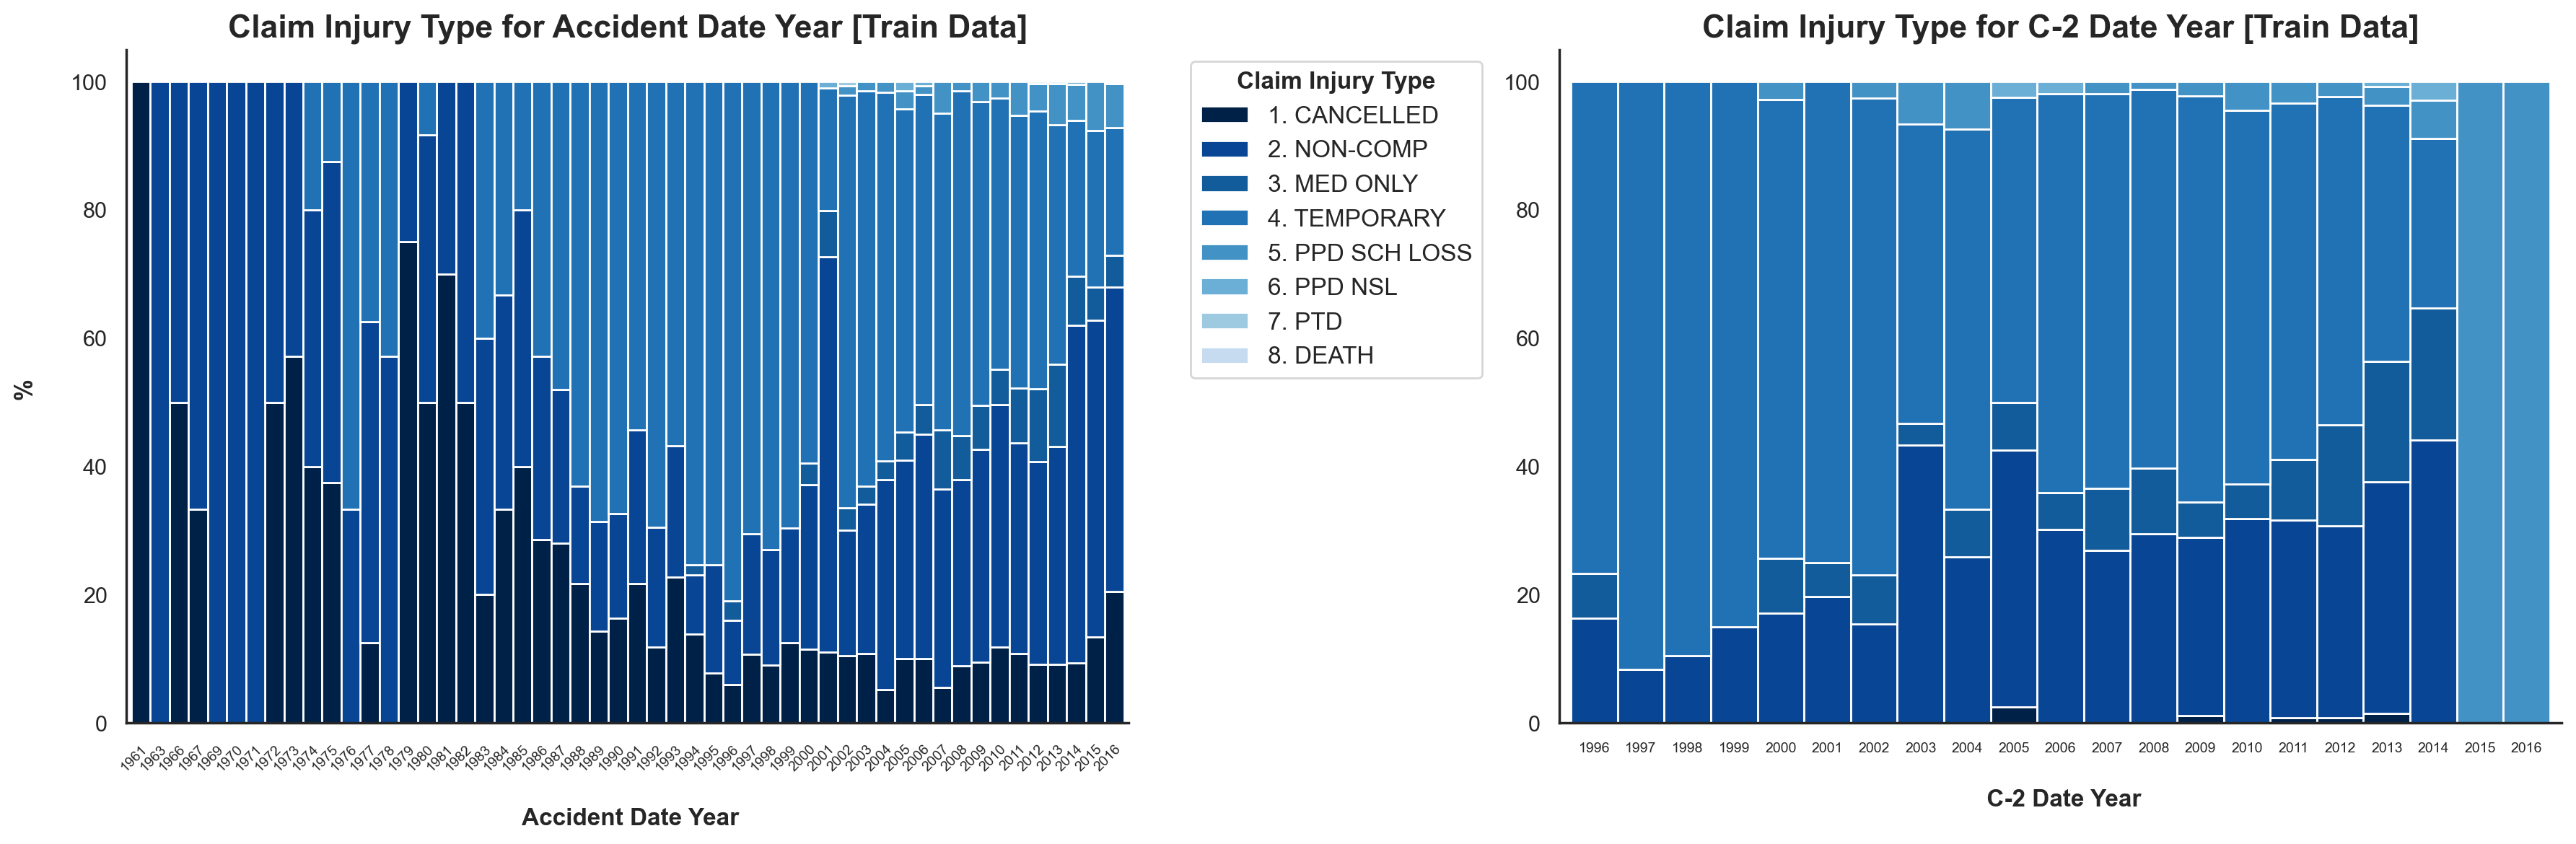

In [84]:
# Check the Bar Stacked Plot for 'Claim Injury Type' for 'Accident Date Year' and 'C-2 Date Year' (outliers) [Train Data]
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Train Data - 'Accident Date Year'
accident_date_year_outliers = train_data[(train_data['Accident Date Year'] < outliers_info.loc['Accident Date Year', 'Lower Bound']) 
                                      | (train_data['Accident Date Year'] > outliers_info.loc['Accident Date Year', 'Upper Bound'])]

accident_date_year_outliers_gb = accident_date_year_outliers.groupby('Accident Date Year')['Claim Injury Type'].value_counts(normalize=True).unstack() * 100
accident_date_year_outliers_gb.index = accident_date_year_outliers_gb.index.astype('int64')
accident_date_year_outliers_gb.plot(kind='bar', stacked=True, ax=ax[0], color=claim_injury_type_palette, width=1)
ax[0].set_title('Claim Injury Type for Accident Date Year [Train Data]', fontsize=16, fontweight='bold')
ax[0].set_xlabel('\n Accident Date Year', fontsize=12, fontweight='bold')
ax[0].set_ylabel('% \n', fontsize=12, fontweight='bold')
ax[0].legend(title='Claim Injury Type', fontsize='12', title_fontproperties={'weight': 'bold', 'size': 12}, bbox_to_anchor=(1.05, 1))
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=7)

# Train Data - 'C-2 Date Year'
c_2_date_year_outliers = train_data[(train_data['C-2 Date Year'] < outliers_info.loc['C-2 Date Year', 'Lower Bound']) 
                                      | (train_data['C-2 Date Year'] > outliers_info.loc['C-2 Date Year', 'Upper Bound'])]

c_2_date_year_outliers_gb = c_2_date_year_outliers.groupby('C-2 Date Year')['Claim Injury Type'].value_counts(normalize=True).unstack() * 100
c_2_date_year_outliers_gb.index = c_2_date_year_outliers_gb.index.astype('int64')
c_2_date_year_outliers_gb.plot(kind='bar', stacked=True, ax=ax[1], color=claim_injury_type_palette, width=1)
ax[1].set_title('Claim Injury Type for C-2 Date Year [Train Data]', fontsize=16, fontweight='bold')
ax[1].set_xlabel('\n C-2 Date Year', fontsize=12, fontweight='bold')
ax[1].set_ylabel('')
ax[1].legend([],[], frameon=False)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=0, ha='center', rotation_mode='anchor', fontsize=7)


sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

> After analyzing the variables, we decided to keep the outliers in the dataset, as they are important for the model to learn the patterns of the data and not to lose information.


<div class="alert alert-block alert-danger" style="font-size:30px; font-weight: bold;">

[NOTE] Everyone agrees with this strategy ??

</div>

In [85]:
# Drop the 'Accident Date Year_Log' and 'C-2 Date Year_Log' columns
X_train = X_train.drop(columns = ['Accident Date Year_Log', 'C-2 Date Year_Log'])
X_val = X_val.drop(columns = ['Accident Date Year_Log', 'C-2 Date Year_Log'])
test_data = test_data.drop(columns = ['Accident Date Year_Log', 'C-2 Date Year_Log'])

---

#### **2 | Handling Missing Values** <a class='anchor' id='2-missing-values'></a>

**`Industry Code`**
   - **Chosen Strategy**: Replace with **NaN** (new category)
   - **Reasoning**: For categorical variables like "Industry Code," we decided to replace missing values with a new category (NaN). This approach allows the model to learn from the absence of data, which can be informative in itself. This approach avoids losing information and is simple to implement.
  
**`Accident Date Day, Month, Weekday, Year`**
   - **Chosen Strategy**: **Median Imputation**
   - **Reasoning**: Each of these variables has a low percentage of missing values ($\approx0.63\%$), so using the median for imputation is both simple and effective. Median imputation is robust to outliers and provides a reasonable estimate without adding complexity.
  
**`C-2 Date Day, Month, Weekday, Year`**
   - **Chosen Strategy**: **KNN Imputation**
   - **Reasoning**: Given the higher missingness (around 2.5% across all splits), using a more sophisticated method like **KNN Imputer** is advisable. KNN can leverage similar samples in the dataset to make more accurate estimations for these missing values. This is particularly helpful for dates, as related date components (day, month, year, weekday) could have patterns that KNN captures well.
  
**`Age at Injury Clean`**
   - **Chosen Strategy**: **Mean or Median Imputation**
   - **Reasoning**: "Age at Injury Clean" has moderate missingness in the train and validation sets (around 0.38-0.39%) but shows a larger gap in the test set (0.25%). Since age is likely normally distributed, either the mean or median could work well. **Median** is preferred if the data has a skew or if there are outliers, but **mean imputation** is a reasonable choice if the distribution is more balanced.

**`Age at Injury Grups`**
   - **Chosen Strategy**: Will be treated like a new category, so we will not need to impute the missing values.

---

In [86]:
# Check how many missing values are left in both training and validation sets
NAs_df = pd.DataFrame({
    'n train': X_train.isnull().sum(),
    '% train': round(X_train.isnull().mean()*100, 2),
    'n val': X_val.isnull().sum(),
    '% val': round(X_val.isnull().mean()*100, 2),
    'n test': test_data.isnull().sum(),
    '% test': round(test_data.isnull().mean()*100, 2)
})
NAs_df[NAs_df['% train'] > 0].sort_index(ascending = True)

,n train,% train,n val,% val,n test,% test
Accident Date Day,2712,0.63,977,0.68,2444,0.63
Accident Date Month,2712,0.63,977,0.68,2444,0.63
Accident Date Weekday,2712,0.63,977,0.68,2444,0.63
Accident Date Year,2712,0.63,977,0.68,2444,0.63
Age at Injury Clean,1633,0.38,553,0.39,982,0.25
C-2 Date Day,10903,2.53,3657,2.55,9134,2.35
C-2 Date Month,10903,2.53,3657,2.55,9134,2.35
C-2 Date Weekday,10903,2.53,3657,2.55,9134,2.35
C-2 Date Year,10903,2.53,3657,2.55,9134,2.35
Industry Code,7454,1.73,2504,1.74,7736,1.99


<div class="alert alert-block alert-warning" style="font-size:25px; font-weight: bold;">

[NOTE] Since there are so few outliers and the KNNImputer model takes so long, I think it's more advantageous to do the preprocessing just once and not have to do it every iteration of K-fold

- It won't change anything in the results :/

</div>

In [87]:
# Check the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().sum()>0]

Index(['Accident Date Day', 'Accident Date Month', 'Accident Date Weekday',
       'Accident Date Year', 'Age at Injury Clean', 'C-2 Date Day',
       'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year', 'Industry Code'],
      dtype='object')

##### **Categorical Variables Approach** <a class='anchor' id='categorical-variables-aproach'></a>

> Since **`Industry Code`** are categorical variables, we will replace the **`NA's`** with a new category **`0` $\rightarrow$ Unknown**.

In [88]:
# Fill the missing values of 'Industry Code' with '0'
X_train['Industry Code'] = X_train['Industry Code'].fillna(0)
X_val['Industry Code'] = X_val['Industry Code'].fillna(0)
test_data['Industry Code'] = test_data['Industry Code'].fillna(0)

# Check the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().sum()>0]

Index(['Accident Date Day', 'Accident Date Month', 'Accident Date Weekday',
       'Accident Date Year', 'Age at Injury Clean', 'C-2 Date Day',
       'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year'],
      dtype='object')

---

##### **Fill Missing Values with Central Tendency Measures**

> Since **`Accident Date`** have low number of **`NA's`** and it is a **`datetime`** type variable, we will replace the **`NA's`** with the **`median`** of the variable, because that metric is more robust to outliers.

- Given the small number of outliers, using a more complex imputation method like **K-Nearest Neighbors (KNN)** is not efficient or necessary in this case. The median provides a robust, straightforward approach that avoids overcomplicating the imputation for a minimal number of missing values.

In [89]:
# Check descriptive statistics of the 'Accident Date Year', 'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday' and 'Age of Injury Clean' columns
X_train[['Accident Date Year', 'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday', 'Age at Injury Clean']].describe().T

,count,mean,std,min,25%,50%,75%,max
Accident Date Year,427807.0,2020.826826,1.863070,1961.0,2020.0,2021.0,2022.0,2023.0
Accident Date Month,427807.0,6.492689,3.467180,1.0,3.0,7.0,9.0,12.0
Accident Date Day,427807.0,15.526653,8.777784,1.0,8.0,15.0,23.0,31.0
Accident Date Weekday,427807.0,2.501574,1.813639,0.0,1.0,2.0,4.0,6.0
Age at Injury Clean,428886.0,42.585032,13.746412,1.0,31.0,42.0,54.0,122.0


> In the case of **`Accident Date Day, Month, Weekday, Year`** and **`Age at Injury Clean`**, have approximately same **mean** and **median**.

In [90]:
######################### First Approach: Filling with Central Tendency Measures #########################
# Impute missing values of Dates columns with the 'median' strategy
for col in ['Accident Date Year', 'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday', 
            'Age at Injury Clean']:
    
    # Median value for each column in the training data only
    median_value = X_train[col].median()
    
    # Fill missing values in all sets with the training median
    X_train[col].fillna(median_value, inplace=True)
    X_val[col].fillna(median_value, inplace=True)
    test_data[col].fillna(median_value, inplace=True)

##############################################################################################################

##### **KNN Imputer <sup>[[1]](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)</sup>** <a class='anchor' id='knn-imputer'></a>

- **KNN Imputer** is a more sophisticated imputation method that leverages the similarity between samples to estimate missing values. It is particularly useful for continuous variables with complex relationships that can be captured by the nearest neighbors.
- This aproach is a good choice for the **`C-2 Date`** variables, which have a higher percentage of missing values (around 2.5% across all splits). The KNN algorithm can leverage the relationships between samples to make more accurate estimations for these missing values.

In [91]:
X_train.select_dtypes(include="number").drop(columns = ['Accident Date Binary', 'C-2 Date Binary', 'C-3 Date Binary', 'First Hearing Date Binary', 
                                                        'IME-4 Reported', 'Weekly Wage Reported', 'Number of Dependents']).columns

Index(['Accident Date Day', 'Accident Date Month', 'Accident Date Weekday',
       'Accident Date Year', 'Age at Injury Clean', 'Assembly Date Day',
       'Assembly Date Month', 'Assembly Date Weekday', 'Assembly Date Year',
       'C-2 Date Day', 'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year',
       'Industry Code', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code'],
      dtype='object')

In [92]:
# Check the columns of the training set (X_train) that have missing values
print('\033[1mNumber of missing values in the training set:\033[0m')
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])
X_train.columns[X_train.isnull().sum()>0]

Number of missing values in the training set:
C-2 Date Day        10903
C-2 Date Month      10903
C-2 Date Weekday    10903
C-2 Date Year       10903
dtype: int64


Index(['C-2 Date Day', 'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year'], dtype='object')

In [93]:
# Fill the rest of columns with missing values with the KNNImputer

# Copy the data
X_train_knn_imputed = X_train.copy(deep=True)                                  # deep=True to avoid the SettingWithCopyWarning
X_train_knn_imputed_n = X_train_knn_imputed.select_dtypes(include="number")    # Select numerical columns

# Columns that are not numerical
columns_to_drop_KNNImputer = ['Accident Date Binary', 'C-2 Date Binary', 'C-3 Date Binary', 'First Hearing Date Binary', 'IME-4 Reported', 'Weekly Wage Reported', 'Number of Dependents']
X_train_knn_imputed_n = X_train_knn_imputed_n.drop(columns = columns_to_drop_KNNImputer)

# Init the transformer
knn_imp = KNNImputer()                                                         # k=5 is the default 

# Fit/transform
X_train_knn_imputed_n.loc[:, :] = knn_imp.fit_transform(X_train_knn_imputed_n)

## Time of Execution KNNImputer: 9m 45s

In [94]:
# Check the columns of the training set (X_train) that have missing values
X_train_knn_imputed_n.columns[X_train_knn_imputed_n.isnull().sum()>0]        # Perfect!

Index([], dtype='object')

In [95]:
# Check the results of the KNNImputer - rows with missing values
X_train_knn_imputed_n[X_train.isnull().any(axis=1)][X_train.columns[X_train.isnull().sum()>0]]

,C-2 Date Day,C-2 Date Month,C-2 Date Weekday,C-2 Date Year
Claim Identifier,,,,
5633459,16.0,5.0,2.6,2019.0
5698305,16.0,6.0,2.4,2021.6
5405393,16.8,4.6,2.0,2017.2
5734219,12.0,3.8,1.4,2021.4
5555247,15.6,6.0,2.0,2021.6
...,...,...,...,...
5750569,14.2,3.6,1.8,2019.2
5632383,18.4,4.4,1.8,2019.0
5963171,13.4,8.4,1.6,2021.4


In [96]:
# Compare rows between X_train and X_train_knn_imputed_n
(X_train.select_dtypes(include="number").drop(columns = columns_to_drop_KNNImputer) != X_train_knn_imputed_n).any(axis=1).sum()

# 10903 rows are different between X_train and X_train_knn_imputed_n [Check!]

10903

In [97]:
# Check if the rows changed are the same that have missing values
len(X_train_knn_imputed_n[X_train.isnull().any(axis=1)].index == X_train[X_train.isnull().any(axis=1)].index)	# Perfect!

10903

In [98]:
# Check how many values have decimals
(X_train_knn_imputed_n % 1 != 0).sum()[(X_train_knn_imputed_n % 1 != 0).sum() > 0]

C-2 Date Day        8664
C-2 Date Month      8677
C-2 Date Weekday    8649
C-2 Date Year       8895
dtype: int64

> To maintain consistency across the dataset, we will round the imputed values to the nearest integer. This ensures that the imputed values align with the original data's discrete nature, avoiding fractional values that could introduce noise. 

In [99]:
# Now do the same for the validation and test data
X_val_knn_imputed = X_val.copy(deep=True)
X_val_knn_imputed_n = X_val_knn_imputed.select_dtypes(include="number")
X_val_knn_imputed_n = X_val_knn_imputed_n.drop(columns = columns_to_drop_KNNImputer)
X_val_knn_imputed_n.loc[:, :] = knn_imp.transform(X_val_knn_imputed_n)

test_data_knn_imputed = test_data.copy(deep=True)
test_data_knn_imputed_n = test_data_knn_imputed.select_dtypes(include="number")
test_data_knn_imputed_n = test_data_knn_imputed_n.drop(columns = columns_to_drop_KNNImputer)
test_data_knn_imputed_n.loc[:, :] = knn_imp.transform(test_data_knn_imputed_n)

#### TimeExecution: 10m 3.7s

In [100]:
# Round the values of the 'C-2 Date Day', 'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year' that have been imputed
X_train_knn_imputed_n[['C-2 Date Day', 'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year']] = \
    X_train_knn_imputed_n[['C-2 Date Day', 'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year']].round()
    
X_val_knn_imputed_n[['C-2 Date Day', 'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year']] = \
    X_val_knn_imputed_n[['C-2 Date Day', 'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year']].round()
    
test_data_knn_imputed_n[['C-2 Date Day', 'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year']] = \
    test_data_knn_imputed_n[['C-2 Date Day', 'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year']].round()

In [101]:
# Check how many values have decimals
(X_train_knn_imputed_n % 1 != 0).sum()[(X_train_knn_imputed_n % 1 != 0).sum() > 0] # Perfect!

Series([], dtype: int64)

In [102]:
# List of columns to be imputed
columns_to_impute = ['C-2 Date Day', 'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year']

# Replace only the specified columns with the imputed values
X_train[columns_to_impute] = X_train_knn_imputed_n[columns_to_impute]
X_val[columns_to_impute] = X_val_knn_imputed_n[columns_to_impute]
test_data[columns_to_impute] = test_data_knn_imputed_n[columns_to_impute]

In [103]:
# Check the data types of the training set
# X_train.dtypes

In [104]:
# Transform the date column + 'Age at Injury Clean' + 'Industry Code' to 'int64' type
for col in ['Accident Date Day', 'Accident Date Weekday', 'Accident Date Month', 'Accident Date Year',
            'C-2 Date Day', 'C-2 Date Month', 'C-2 Date Year', 'C-2 Date Weekday',
            'Age at Injury Clean', 'Industry Code']:
        X_train[col] = X_train[col].astype('int64')
        X_val[col] = X_val[col].astype('int64')
        test_data[col] = test_data[col].astype('int64')

---

# TO DO: Redo the variables as one hot encoded and rerun feature selection, noting the differences.

#### **3 | Encoding** <a class='anchor' id='3-encoding'></a>

- Feature encoding is a process used to transform categorical data into numerical values that can be understood by ML algorithms. 
- There are several types of encoding, including label encoding and one-hot encoding.

<br>

<div style="max-width:750px; display: block; margin: 0 auto;">

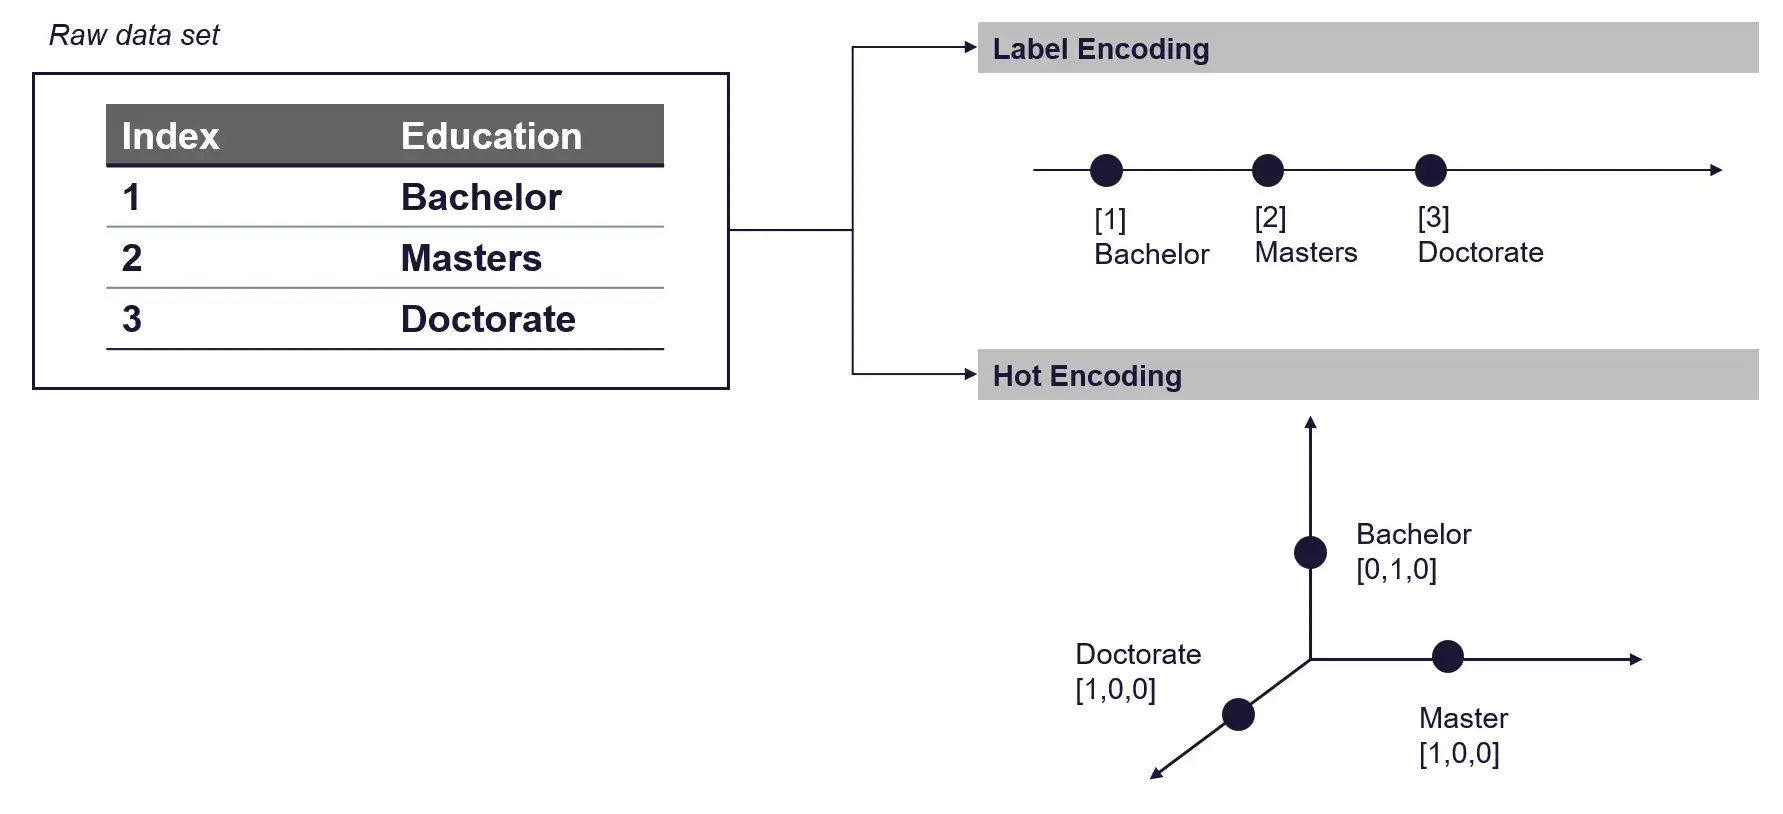
    
</div>

<center><b>Figure 1 | </b> Example of Encoding Techniques.</center> <br>


---

##### **Label/Ordinal Encoding** <sup>[**[2]**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) </sup> <a class='anchor' id='label-ordinal-encoding'></a>

- **Label/Ordinal encoding** involves assigning a numeric value to each categorical value. 
- Can be effective if exists an inherent order to the categorical values, which can be encoded as numeric values from $1$ to $k$. 
- This way of encoding can cause problems for some algorithms because the assigned integers do not necessarily reflect any inherent order or relationship between the categories. 
- Alternatively, you can use **One-hot encoding** to transform categorical values into numerical values.

<br>

##### **One-Hot Encoding** <sup>[**[3]**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)</sup> <a class='anchor' id='one-hot-encoding'></a>

- In **One-hot encoding**, the column of categorical values is split into several new columns, one for each unique categorical value.
- Alternatively, you can use **One-hot encoding** to transform categorical values into numerical values. 
- In **one-hot encoding**, we represent a categorical variable as a group of binary variables, where each binary variable represents one category. 
- The binary variable indicates whether the category is present in an observation ($1$) or not ($0$). 
- A categorical variable with $n$ unique categories can be encoded in $(n-1)$ binary variables.
- This results in a *sparse matrix*, where most of the values are $0$.
- The disadvantage of one-hot encoding is that it can significantly increase the size of the dataset, which can be a problem if the column you want to encode contains hundreds or thousands of unique categorical values.
- I.e., the problem with one-hot encoding is that it can lead to large and sparse datasets with high dimensionality.

---

##### **Target Encoding**

In [105]:
# Mapping the target variable 'Claim Injury Type' to numerical values
claim_injury_type_dict = {"1. CANCELLED": 1, "2. NON-COMP": 2, 
                          "3. MED ONLY": 3, "4. TEMPORARY": 4, 
                          "5. PPD SCH LOSS": 5, "6. PPD NSL": 6, 
                          "7. PTD": 7, "8. DEATH": 8}

# Encode the target variable
y_train_encoded = y_train.map(claim_injury_type_dict)
y_val_encoded = y_val.map(claim_injury_type_dict)

# Check the first 5 values of the encoded target variable [Compare with the original target variable]
pd.DataFrame({'Original': y_train, 'Encoded': y_train_encoded})

,Original,Encoded
Claim Identifier,,
6094685,2. NON-COMP,2
5535751,4. TEMPORARY,4
5715773,2. NON-COMP,2
5765474,4. TEMPORARY,4
6130855,2. NON-COMP,2
...,...,...
5614897,2. NON-COMP,2
5994552,4. TEMPORARY,4
5659309,4. TEMPORARY,4


In [106]:
# Replace the target variable 'Claim Injury Type' with the encoded values, after confirming the correctness of the encoding
y_train = y_train_encoded
y_val = y_val_encoded

In [107]:
# Check the 'object' columns of the training set (X_train) = Columns to be encoded
print('\033[1mColumns to be encoded:\033[0m [',len(X_train.select_dtypes(include = 'object').columns), ']' + '\n',
      X_train.select_dtypes(include = 'object').columns)

Columns to be encoded: [ 11 ]
 Index(['Age at Injury Group', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'COVID-19 Indicator', 'Carrier Type Bucket',
       'District Name', 'Gender', 'Medical Fee Region',
       'WCIO Cause of Injury Bucket', 'WCIO Nature of Injury Bucket',
       'WCIO Part of Body Bucket'],
      dtype='object')



##### 🎛️ **Encoding Justification**

<style>
.tablecustom {
    border-collapse: collapse;
    width: 100%;
    font-size: 16px;
}

.tablecustom td, .tablecustom th {
    border: 2px solid #ddd;
    padding: 8px;
}

.tablecustom tr:nth-child(1) th {
    background-color: #e0e0e0; /* Header row background */
    font-weight: bold;
}
.tablecustom th:first-child, .tablecustom td:first-child {
    background-color: #e0e0e0; /* First column background */
    font-weight: bold;
}

.tablecustom th:first-child {
    border-top: none;
    border-left: none;
    background-color: #fff !important;
    color: #e0e0e0;
}

</style>

<div class="tablecustom" style="text-align:center; justify-content: center; align-items: center; display: flex; flex-wrap: wrap;">


| **Variable \ Encoding**             | **Encoding Method**     | **Justification**                                                         |
|:-----------------------------------:|:-----------------------:|:-------------------------------------------------------------------------:|
| **Age at Injury Clean**             | Ordinal Encoding        | The variable has an ordinal relationship.                                 |
| **Alternative Dispute Resolution**  | One-Hot Encoding        | Binary categorical variable  + `Unknown` category.                        |
| **Attorney/Representative**         | One-Hot Encoding        | Binary categorical variable                                               |
| **COVID-19 Indicator**              | One-Hot Encoding        | Binary categorical variable                                               |
| **District Name**                   | One-Hot Encoding        | Categorical variable with no ordinal relationship.                        |
| **Gender**                          | One-Hot Encoding        | Categorical variable with no ordinal relationship.                        |
| **Medical Fee Region**              | ONE-HOT ENCODING        | Maintaining the original order of the categories.                         |
| **Carrier Type Bucket**             | ONE-HOT ENCODING        | Maintaining the original order of the categories.                         |
| **WCIO Cause of Injury Bucket**     | ONE-HOT ENCODING        | Maintaining the original order of the categories.                         |
| **WCIO Nature of Injury Bucket**    | ONE-HOT ENCODING        | Maintaining the original order of the categories.                         |
| **WCIO Part of Body Bucket**        | ONE-HOT ENCODING        | Maintaining the original order of the categories.                         |

</div>

<div class="alert alert-block alert-danger" style="font-size:50px; font-weight: bold;">

[NOTE] Make a decision

</div>

In [108]:
## for more details check:
# ?OrdinalEncoder

In [109]:
## for more details check:
# ?OneHotEncoder

In [110]:
columns_to_OrdinalEncode = ['Age at Injury Group']

columns_to_OneHotEncode = ['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator', 'District Name', 'Gender', 'Medical Fee Region', 'Carrier Type Bucket', 'WCIO Cause of Injury Bucket', 'WCIO Nature of Injury Bucket', 'WCIO Part of Body Bucket']

In [111]:
################### First Approach: Label Encoding ###################
# Label/Ordinal Encoding

# Create a new dataframe to store the encoded columns
X_train_ordinal_encoded = X_train.copy()
X_val_ordinal_encoded = X_val.copy()
test_data_ordinal_encoded = test_data.copy()

# Initialize the OrdinalEncoder (Coder for categorical features)
ordinal_encoder = OrdinalEncoder()   # The number of categories is based on alphabetical order

# Fit the ordinal_encoder on all data (Avoid that some categories are not present in the training data)
ordinal_encoder.fit(pd.concat([X_train_ordinal_encoded, X_val_ordinal_encoded, test_data_ordinal_encoded], axis=0)[columns_to_OrdinalEncode])

# Transform the training data [All categorical columns will be transformed into numerical values]
X_train_ordinal_encoded_df = pd.DataFrame(
    ordinal_encoder.transform(X_train_ordinal_encoded[columns_to_OrdinalEncode]),      # Transform the data
    columns=columns_to_OrdinalEncode,                                                  # Columns names are the same
    index=X_train_ordinal_encoded.index)                                               # Keep the same index as the original dataframe

X_train_ordinal_encoded = pd.concat([X_train_ordinal_encoded.drop(columns=columns_to_OrdinalEncode), X_train_ordinal_encoded_df], axis=1)

# Transform the validation data -> I just 'transform' it because the ordinal_encoder is already fitted on the training data
X_val_ordinal_encoded_df = pd.DataFrame(
    ordinal_encoder.transform(X_val_ordinal_encoded[columns_to_OrdinalEncode]), 
    columns=columns_to_OrdinalEncode, 
    index=X_val_ordinal_encoded.index)
X_val_ordinal_encoded = pd.concat([X_val_ordinal_encoded.drop(columns=columns_to_OrdinalEncode), X_val_ordinal_encoded_df], axis=1)

# Transform the test data
test_data_ordinal_encoded_df = pd.DataFrame(
    ordinal_encoder.transform(test_data_ordinal_encoded[columns_to_OrdinalEncode]),
    columns=columns_to_OrdinalEncode, 
    index=test_data_ordinal_encoded.index)
test_data_ordinal_encoded = pd.concat([test_data_ordinal_encoded.drop(columns=columns_to_OrdinalEncode), test_data_ordinal_encoded_df], axis=1)
######################################################################

In [112]:
# Check the label encoded columns of the training set (X_train_ordinal_encoded)
pd.concat([X_train[columns_to_OrdinalEncode],                       # Original columns
           X_train_ordinal_encoded[columns_to_OrdinalEncode]],      # Encoded columns
          axis=1, keys=["Original", "Encoded"]).drop_duplicates()   # Assigning names to the two levels and show only unique rows

,Original,Encoded
,Age at Injury Group,Age at Injury Group
Claim Identifier,,
6094685,41-60,3.0
5715773,61-80,4.0
6130855,21-40,2.0
5791218,0-20,1.0
5790390,81-100,5.0
5805396,Unknown,6.0
5815318,+100,0.0


In [113]:
# Extract dictionary of the numerical values for each categorical column
# Source: https://stackoverflow.com/questions/57156480/getting-cardinality-from-ordinal-encoding-in-scikit-learn
encoding = ordinal_encoder.categories_
encoding_feature = lambda x: dict(zip(x, range(len(x))))
encoding_full = [encoding_feature(feature_elem) for feature_elem in encoding]

# Associate the encoding with the columns
encoding_dict = dict(zip(columns_to_OrdinalEncode, encoding_full))
print(encoding_dict)

{'Age at Injury Group': {'+100': 0, '0-20': 1, '21-40': 2, '41-60': 3, '61-80': 4, '81-100': 5, 'Unknown': 6}}


In [114]:
# Transform columns_to_OrdinalEncode to 'int64' type
X_train_ordinal_encoded[columns_to_OrdinalEncode] = X_train_ordinal_encoded[columns_to_OrdinalEncode].astype('int64')
X_val_ordinal_encoded[columns_to_OrdinalEncode] = X_val_ordinal_encoded[columns_to_OrdinalEncode].astype('int64')
test_data_ordinal_encoded[columns_to_OrdinalEncode] = test_data_ordinal_encoded[columns_to_OrdinalEncode].astype('int64')

In [115]:
################### Second Approach: One-Hot Encoding ###################
# One-Hot Encoding

# Create a new dataframe for the One-Hot Encoding
X_train_ohe = X_train.copy()
X_val_ohe = X_val.copy()
test_data_ohe = test_data.copy()

# Function to change the name of the columns 
# Source: https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html
def custom_combiner(feature, category):
    return str(feature) + "_" + str(category)

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(feature_name_combiner=custom_combiner,       # Custom function to change the name of the columns
                                handle_unknown="ignore",                     # Ignore unknown categories
                                sparse_output=False,                         # sparse=False to return a numpy array
                                drop="first")                                # drop='first' to fix the dummy variable trap (n-1)

# Fit the one_hot_encoder on the specified columns
one_hot_encoder.fit(pd.concat([X_train_ohe, X_val_ohe, test_data_ohe], axis=0)[columns_to_OneHotEncode])

# Transform the specified columns in the training data
X_train_ohe_values = one_hot_encoder.transform(X_train_ohe[columns_to_OneHotEncode])
X_train_ohe_values_df = pd.DataFrame(X_train_ohe_values, 
                                     columns=one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode), 
                                     index=X_train_ohe.index)
X_train_ohe = pd.concat([X_train_ohe.drop(columns=columns_to_OneHotEncode), X_train_ohe_values_df], axis=1)

# Transform the specified columns in the validation data
X_val_ohe_values = one_hot_encoder.transform(X_val_ohe[columns_to_OneHotEncode])
X_val_ohe_values_df = pd.DataFrame(X_val_ohe_values, 
                                   columns=one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode), 
                                   index=X_val_ohe.index)
X_val_ohe = pd.concat([X_val_ohe.drop(columns=columns_to_OneHotEncode), X_val_ohe_values_df], axis=1)

# Transform the specified columns in the test data
test_data_ohe_values = one_hot_encoder.transform(test_data_ohe[columns_to_OneHotEncode])
test_data_ohe_values_df = pd.DataFrame(test_data_ohe_values, 
                                       columns=one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode), 
                                       index=test_data_ohe.index)
test_data_ohe = pd.concat([test_data_ohe.drop(columns=columns_to_OneHotEncode), test_data_ohe_values_df], axis=1)

In [116]:
# Check the one-hot encoded columns of the training set (X_train_ohe)
pd.concat([X_train[columns_to_OneHotEncode],                                              # Original columns
           X_train_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)]],  # Encoded columns
          axis=1, keys=["Original", "Encoded"]).drop_duplicates()                         # Assigning names to the two levels and show only unique rows

Original                          \
                 Alternative Dispute Resolution Attorney/Representative   
Claim Identifier                                                          
6094685                                       N                       N   
5535751                                       N                       Y   
5715773                                       N                       N   
5765474                                       N                       Y   
6130855                                       N                       N   
...                                         ...                     ...   
6025741                                       N                       Y   
5904225                                       N                       Y   
5997858                                       N                       N   
5409759                                       N                       N   
5744816                                       N                       N   

                                                                             \
                 COVID-19 Indicator District Name Gender Medical Fee Region   
Claim Identifier                                                              
6094685                           N       BUFFALO      F                  I   
5535751                           N           NYC      F                 IV   
5715773                           N           NYC      F                 IV   
5765474                           N           NYC      F                 IV   
6130855                           N           NYC      M                 IV   
...                             ...           ...    ...                ...   
6025741                           N      SYRACUSE      M                 UK   
5904225                           N           NYC      M                 IV   
5997858                           N     HAUPPAUGE      F                III   
5409759                           N    BINGHAMTON      F                 II   
5744816                           N     HAUPPAUGE      F                III   

                                                                  \
                 Carrier Type Bucket WCIO Cause of Injury Bucket   
Claim Identifier                                                   
6094685                  1A. PRIVATE                    4 - Fall   
5535751                  1A. PRIVATE                  8 - Struck   
5715773                      2A. SIF             6 - Strain_data   
5765474              3A. SELF PUBLIC             6 - Strain_data   
6130855                  1A. PRIVATE                  8 - Struck   
...                              ...                         ...   
6025741                      2A. SIF          10 - Miscellaneous   
5904225             4A. SELF PRIVATE                  9 - Rubbed   
5997858              3A. SELF PUBLIC                    4 - Fall   
5409759                  1A. PRIVATE          10 - Miscellaneous   
5744816                      2A. SIF                     3 - Cut   

                                                                         \
                 WCIO Nature of Injury Bucket  WCIO Part of Body Bucket   
Claim Identifier                                                          
6094685                          1 - Specific     V - Lower Extremities   
5535751                          1 - Specific                 II - Neck   
5715773                          1 - Specific                IV - Trunk   
5765474                          1 - Specific  VI - Multiple Body Parts   
6130855                          1 - Specific     V - Lower Extremities   
...                                       ...                       ...   
6025741                          1 - Specific  VI - Multiple Body Parts   
5904225                          1 - Specific                IV - Trunk   
5997858                          3 - Multiple     V - Lower Extremities   
5409759           2 - Occupa

In [117]:
# Transform columns_to_OneHotEncode to 'int32' type [Just to be more easy to identify the binary columns]
X_train_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)] = X_train_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)].astype('int32')
X_val_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)] = X_val_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)].astype('int32')
test_data_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)] = test_data_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)].astype('int32')

> **One-Hot Encoding** cannot be applied to the **`Claim Injury Type`** variable, since that is the target variable. That approach would make the problem **multi-label** and not a **multi-class** problem, which is the case in this project.

> If we were to apply **One-Hot Encoding** to the target variable, we would have to create a separate model for each class, which would make the problem much more complex for the model and would very likely lead to lower performance, or it would require much more data in order to reach the same performance as regular classification.<sup>[[3]](https://datascience.stackexchange.com/questions/87542/onehotencoding-target-variable)</sup>

In [118]:
# Merge the dataframes with the encoded columns - drop the original columns & keep the encoded columns
X_train = pd.concat([X_train.drop(columns = columns_to_OrdinalEncode + columns_to_OneHotEncode), 
                           X_train_ordinal_encoded[columns_to_OrdinalEncode], 
                           X_train_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)]], axis=1)

# Sort the columns alphabetically
X_train = X_train[sorted(X_train.columns)]

X_val = pd.concat([X_val.drop(columns = columns_to_OrdinalEncode + columns_to_OneHotEncode),
                   X_val_ordinal_encoded[columns_to_OrdinalEncode], 
                   X_val_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)]], axis=1)
X_val = X_val[sorted(X_val.columns)]

test_data = pd.concat([test_data.drop(columns = columns_to_OrdinalEncode + columns_to_OneHotEncode),
                       test_data_ordinal_encoded[columns_to_OrdinalEncode], 
                       test_data_ohe[one_hot_encoder.get_feature_names_out(columns_to_OneHotEncode)]], axis=1)
test_data = test_data[sorted(test_data.columns)]

In [119]:
# Check the shape of the Training, Validation and Test Data
X_train.shape, X_val.shape, test_data.shape # Perfect!

((430519, 67), (143507, 67), (387975, 67))

---

#### **4 | Multicollinearity** <a class='anchor' id='4-multicollinearity'></a>


##### **Variance Inflation Factor (VIF)** <sup>[**[4]**](https://www.statisticshowto.com/variance-inflation-factor/)</sup> <a class='anchor' id='variance-inflation-factor-vif'></a> <sup>[**[5]**](https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)</sup>

- **VIF** is a measure of multicollinearity among predictor variables within a multiple regression.
- **VIF** estimates how much the variance of a regression coefficient is increased due to multicollinearity in the model.

The formula for **VIF** is:

$$VIF = \frac{1}{1 - R^2}$$

Where $R^2$ is the coefficient of determination in a regression model where the predictor variable is regressed against all other predictor variables.

- **VIF** values are always greater than or equal to $1$.
- If **VIF** is equal to $1$, then there is no correlation among the predictor variables.
- If **VIF** is greater than $1$, then the predictors are correlated with other variables in the model.
- The general rule of thumb is that if **VIF** is greater than $10$, then multicollinearity is high and the predictors are highly correlated.
- In this case, the predictors should be removed from the model.

<br>

> In other words, **Variance Inflation Factor (VIF)** measures how much the variance of a coefficient is inflated due to multicollinearity with other independent variables. The square root of the VIF for a given variable indicates how much larger its standard deviation is compared to a scenario where that variable is not correlated with any other independent variable. If there is no correlation between variables, the VIF values are close to 1.


In [120]:
### Use VIF to analyse multicollinearity

# Compute the vif for all given features
def compute_vif(df, considered_features='all'):
    """
    :param df: DataFrame containing the features to compute VIF for.
    :param considered_features: List of features to consider for VIF calculation. If 'all', all features in the DataFrame will be considered.
    
    :return: DataFrame containing VIF values for the considered features.
    """
    # If no features are given, consider all features
    if considered_features == 'all':
        considered_features = df.columns
    
    # Create a new dataframe with the considered features
    X = df[considered_features]
    
    # Ensure all features are numeric
    for column in X.columns:
        X[column] = pd.to_numeric(X[column], errors='coerce')
    
    # The calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # Create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    vif = vif[vif['Variable']!='intercept']
    return vif

# Features to consider removing (VIF >5)
compute_vif(X_train).sort_values('VIF', ascending=False)

,Variable,VIF
50,WCIO Cause of Injury Bucket_6 - Strain_data,1057.876726
48,WCIO Cause of Injury Bucket_4 - Fall,900.721685
52,WCIO Cause of Injury Bucket_8 - Struck,766.695298
45,WCIO Cause of Injury Bucket_10 - Miscellaneous,682.456173
55,WCIO Nature of Injury Bucket_1 - Specific,567.378610
...,...,...
3,Accident Date Weekday,1.013680
1,Accident Date Day,1.003934
36,Gender_X,1.001498
7,Alternative Dispute Resolution_U,1.000610


##### **Multicollinearity Analysis | Notes**

- **Assembly Date Month** ($VIF \approx 8.27$) and **C-2 Date Month** ($VIF \approx 7.81$)
  - These variables show high multicollinearity, which is expected given their close relationship. Both variables represent different dates related to the injury, leading to inherent correlations.
- Variables like **District Name_NYC** ($VIF \approx 5.10$) and **Medical Fee Region** ($VIF \approx 4.52$) also show moderate multicollinearity. 
    - These variables are likely correlated due to the geographical relationship between the district and the medical fee region.
- **Age at Injury Clean** ($VIF \approx 4.21$) and **Age at Injury Group** ($VIF \approx 4.20$) show similar redundancy as groups have been created based on the original variable.
- Moderate $VIF$ values are observed for features like **C-2 Date Day** and **Assembly Date Day**, both near $3$, which implies some level of multicollinearity, though not severe.
- Many features, especially categorical ones (e.g., **Accident Date Weekday**, **Gender**, and **Alternative Dispute Resolution_U**), have VIF values close to $1$, indicating minimal multicollinearity.

<br>

In [121]:
# See results without 'Assembly Date Month'
compute_vif(X_train.drop(columns = ['Assembly Date Month'])).sort_values('VIF', ascending=False)

# Of course, we will discard one of other redundant columns in the next steps

,Variable,VIF
49,WCIO Cause of Injury Bucket_6 - Strain_data,1057.819409
47,WCIO Cause of Injury Bucket_4 - Fall,900.681288
51,WCIO Cause of Injury Bucket_8 - Struck,766.654216
44,WCIO Cause of Injury Bucket_10 - Miscellaneous,682.417118
54,WCIO Nature of Injury Bucket_1 - Specific,567.317521
...,...,...
3,Accident Date Weekday,1.013660
1,Accident Date Day,1.003934
35,Gender_X,1.001080
7,Alternative Dispute Resolution_U,1.000544


---

## **💾 Save Data**

---

> For time efficiency, we will use the dataset after the **Feature Engineering** process in **Feature Selection** techniques.

---

## **🎚️ Feature Selection** 

In [123]:
# Load the training and validation sets after feature engineering
X_train = pd.read_parquet('data/2ndNotebook/X_train.parquet')
X_val = pd.read_parquet('data/2ndNotebook/X_val.parquet')
test_data = pd.read_parquet('data/2ndNotebook/test_data.parquet')

# Load the target variable
y_train = pd.read_parquet('data/2ndNotebook/y_train.parquet').squeeze()   # .squeeze() to convert to Series
y_val = pd.read_parquet('data/2ndNotebook/y_val.parquet').squeeze()


# Check the shape of the training, validation and test data

# Check the shape of the training, validation and test data (Features)
print(X_train.shape, X_val.shape, test_data.shape)

# Check the shape of the training, validation and test data (Target)
print('\n',y_train.shape, y_val.shape)

(430519, 44) (143507, 44) (387975, 44)

 (430519,) (143507,)


In [ ]:
# # Check the unique values of each column
# for col in X_train.columns:
#     unique_values = sorted(X_train[col].unique(), key=lambda x: (str(type(x)), x))
#     # print(f"\033[1m{col}\033[0m [{X_train[col].nunique()}]")
#     print(f'\033[1m{col}\033[0m [{X_train[col].nunique()}]: {unique_values}') # Perfect!

In [ ]:
# # Check the data types of the training set
# X_train.dtypes

In [124]:
# Associate the data types ['int64' - Numerical and 'int32' - Binary -  Just to be more easy to identify the binary columns]
# Define binary and numerical columns
binary_columns = [
    'Accident Date Binary', 'C-2 Date Binary', 'C-3 Date Binary', 'First Hearing Date Binary', 
    'COVID-19 Indicator_Y', 'Alternative Dispute Resolution_U', 'Alternative Dispute Resolution_Y', 
    'Attorney/Representative_Y', 'Gender_M', 'Gender_U', 'Gender_X', 'District Name_BINGHAMTON', 
    'District Name_BUFFALO', 'District Name_HAUPPAUGE', 'District Name_NYC', 
    'District Name_ROCHESTER', 'District Name_STATEWIDE', 'District Name_SYRACUSE', 
    'IME-4 Reported', 'Weekly Wage Reported'
]

numerical_columns = [
    'Accident Date Day', 'Accident Date Month', 'Accident Date Weekday', 'Accident Date Year', 
    'Assembly Date Day', 'Assembly Date Month', 'Assembly Date Weekday', 'Assembly Date Year', 
    'C-2 Date Day', 'C-2 Date Month', 'C-2 Date Weekday', 'C-2 Date Year', 
    'Age at Injury Clean', 'Age at Injury Group', 'Carrier Type Bucket', 
    'Industry Code', 'Medical Fee Region', 'Number of Dependents', 
    'WCIO Cause of Injury Bucket', 'WCIO Cause of Injury Code', 
    'WCIO Nature of Injury Bucket', 'WCIO Nature of Injury Code', 
    'WCIO Part Of Body Code', 'WCIO Part of Body Bucket'
]

In [125]:
# Update the data types for the columns (binary columns as 'int32', numerical columns as 'int64')
X_train[binary_columns] = X_train[binary_columns].astype('int32')
X_val[binary_columns] = X_val[binary_columns].astype('int32')
test_data[binary_columns] = test_data[binary_columns].astype('int32')

X_train[numerical_columns] = X_train[numerical_columns].astype('int64')
X_val[numerical_columns] = X_val[numerical_columns].astype('int64')
test_data[numerical_columns] = test_data[numerical_columns].astype('int64')

# Check the data types after the change
# pd.DataFrame({'Data Type': X_train.dtypes})

### **Filter Methods**

<div style="max-width:750px; display: block; margin: 0 auto;">
    <img src="https://machinelearningmastery.com/wp-content/uploads/2019/11/Overview-of-Feature-Selection-Techniques3.png">
</div>

<br>

- Correlation coefficient   ✅
- Chi-Square Test ✅ (with ETA Squared)

> On previous notebook, we have already done the **Filter Methods**, but we will do it again to check if the **Feature Engineering** process has changed the results.

##### **Correlation Coefficient**

In [126]:
# Spearman correlation matrix
cor_spearman = pd.concat([X_train, y_train], axis=1).corr(method='spearman')
cor_spearman = cor_spearman.round(2)
cor_spearman

,Accident Date Binary,Accident Date Day,Accident Date Month,Accident Date Weekday,Accident Date Year,Age at Injury Clean,Age at Injury Group,Alternative Dispute Resolution_U,Alternative Dispute Resolution_Y,Assembly Date Day,Assembly Date Month,Assembly Date Weekday,Assembly Date Year,Attorney/Representative_Y,C-2 Date Binary,C-2 Date Day,C-2 Date Month,C-2 Date Weekday,C-2 Date Year,C-3 Date Binary,COVID-19 Indicator_Y,Carrier Type Bucket,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,District Name_SYRACUSE,First Hearing Date Binary,Gender_M,Gender_U,Gender_X,IME-4 Reported,Industry Code,Medical Fee Region,Number of Dependents,WCIO Cause of Injury Bucket,WCIO Cause of Injury Code,WCIO Nature of Injury Bucket,WCIO Nature of Injury Code,WCIO Part Of Body Code,WCIO Part of Body Bucket,Weekly Wage Reported,Claim Injury Type
Accident Date Binary,1.00,-0.00,0.01,-0.02,0.00,0.06,0.07,-0.00,-0.00,0.00,0.00,-0.00,-0.01,0.09,0.20,0.00,-0.00,-0.00,-0.00,-0.10,-0.02,0.01,-0.01,0.00,0.00,0.02,-0.02,0.01,-0.01,-0.02,0.02,-0.01,-0.00,-0.02,-0.06,0.02,0.0,-0.08,-0.01,-0.06,-0.03,-0.06,-0.07,-0.06,-0.08
Accident Date Day,-0.00,1.00,0.00,-0.01,-0.02,-0.01,-0.01,0.00,0.00,0.03,0.01,0.00,-0.00,0.00,-0.00,0.05,0.01,-0.00,0.00,-0.00,0.01,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.01,0.00,0.00,0.00,0.00,0.00,-0.0,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Accident Date Month,0.01,0.00,1.00,-0.01,-0.07,-0.02,-0.02,-0.00,0.00,0.01,0.69,-0.02,0.01,-0.01,-0.00,0.00,0.67,-0.01,0.02,0.01,-0.04,-0.01,-0.00,-0.00,0.00,0.00,-0.00,0.01,-0.00,0.01,0.01,0.00,0.01,-0.00,-0.01,0.00,-0.0,0.02,-0.01,-0.02,-0.01,-0.01,-0.00,-0.01,-0.02
Accident Date Weekday,-0.02,-0.01,-0.01,1.00,-0.01,-0.04,-0.04,-0.00,-0.01,0.00,-0.00,-0.04,-0.01,0.00,-0.01,0.00,-0.00,-0.05,-0.01,-0.00,0.03,-0.00,-0.01,-0.01,-0.01,0.03,-0.01,-0.00,-0.01,-0.00,-0.02,0.00,0.00,-0.00,0.04,0.03,0.0,-0.01,0.01,0.01,0.00,0.01,0.01,0.00,-0.00
Accident Date Year,0.00,-0.02,-0.07,-0.01,1.00,-0.02,-0.02,0.00,-0.01,0.01,0.10,-0.00,0.93,-0.05,-0.05,0.01,0.09,0.01,0.91,0.06,-0.09,-0.02,0.00,-0.00,-0.00,-0.00,-0.00,-0.01,0.00,0.06,-0.01,0.01,0.01,-0.02,0.00,-0.01,0.0,0.05,-0.03,-0.03,-0.03,-0.15,0.10,-0.01,-0.04
Age at Injury Clean,0.06,-0.01,-0.02,-0.04,-0.02,1.00,0.91,0.00,0.02,-0.00,-0.01,0.00,-0.02,0.14,0.02,-0.00,-0.02,0.01,-0.02,-0.11,0.00,0.06,-0.01,-0.00,0.02,0.02,-0.01,0.01,-0.02,-0.12,-0.03,-0.01,-0.00,0.12,-0.01,0.02,0.0,-0.00,-0.02,0.02,0.04,0.01,0.04,0.09,0.10
Age at Injury Group,0.07,-0.01,-0.02,-0.04,-0.02,0.91,1.00,0.00,0.01,-0.00,-0.01,0.00,-0.02,0.12,0.04,-0.00,-0.01,0.00,-0.02,-0.10,-0.00,0.04,-0.01,0.00,0.02,0.01,-0.01,0.01,-0.01,-0.10,-0.03,-0.01,-0.00,0.10,-0.02,0.02,-0.0,-0.01,-0.02,0.01,0.03,-0.00,0.02,0.08,0.08
Alternative Dispute Resolution_U,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,1.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.02,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.0,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00
Alternative Dispute Resolution_Y,-0.00,0.00,0.00,-0.01,-0.01,0.02,0.01,-0.00,1.00,0.00,0.00,-0.00,-0.00,-0.03,0.41,-0.01,-0.00,-0.00,0.01,0.03,-0.01,0.11,-0.01,-0.02,0.01,0.05,-0.02,-0.01,-0.02,0.04,0.05,-0.01,-0.00,-0.03,-0.11,0.05,-0.0,-0.11,-0.11,-0.20,-0.11,-0.09,-0.11,-0.05,-0.06
Assembly Date Day,0.00,0.03,0.01,0.00,0.01,-0.00,-0.00,0.00,0.00,1.00,-0.00,0.00,-0.01,-0.00,-0.00,0.82,-0.00,-0.01,-0.01,0.01,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.0,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00


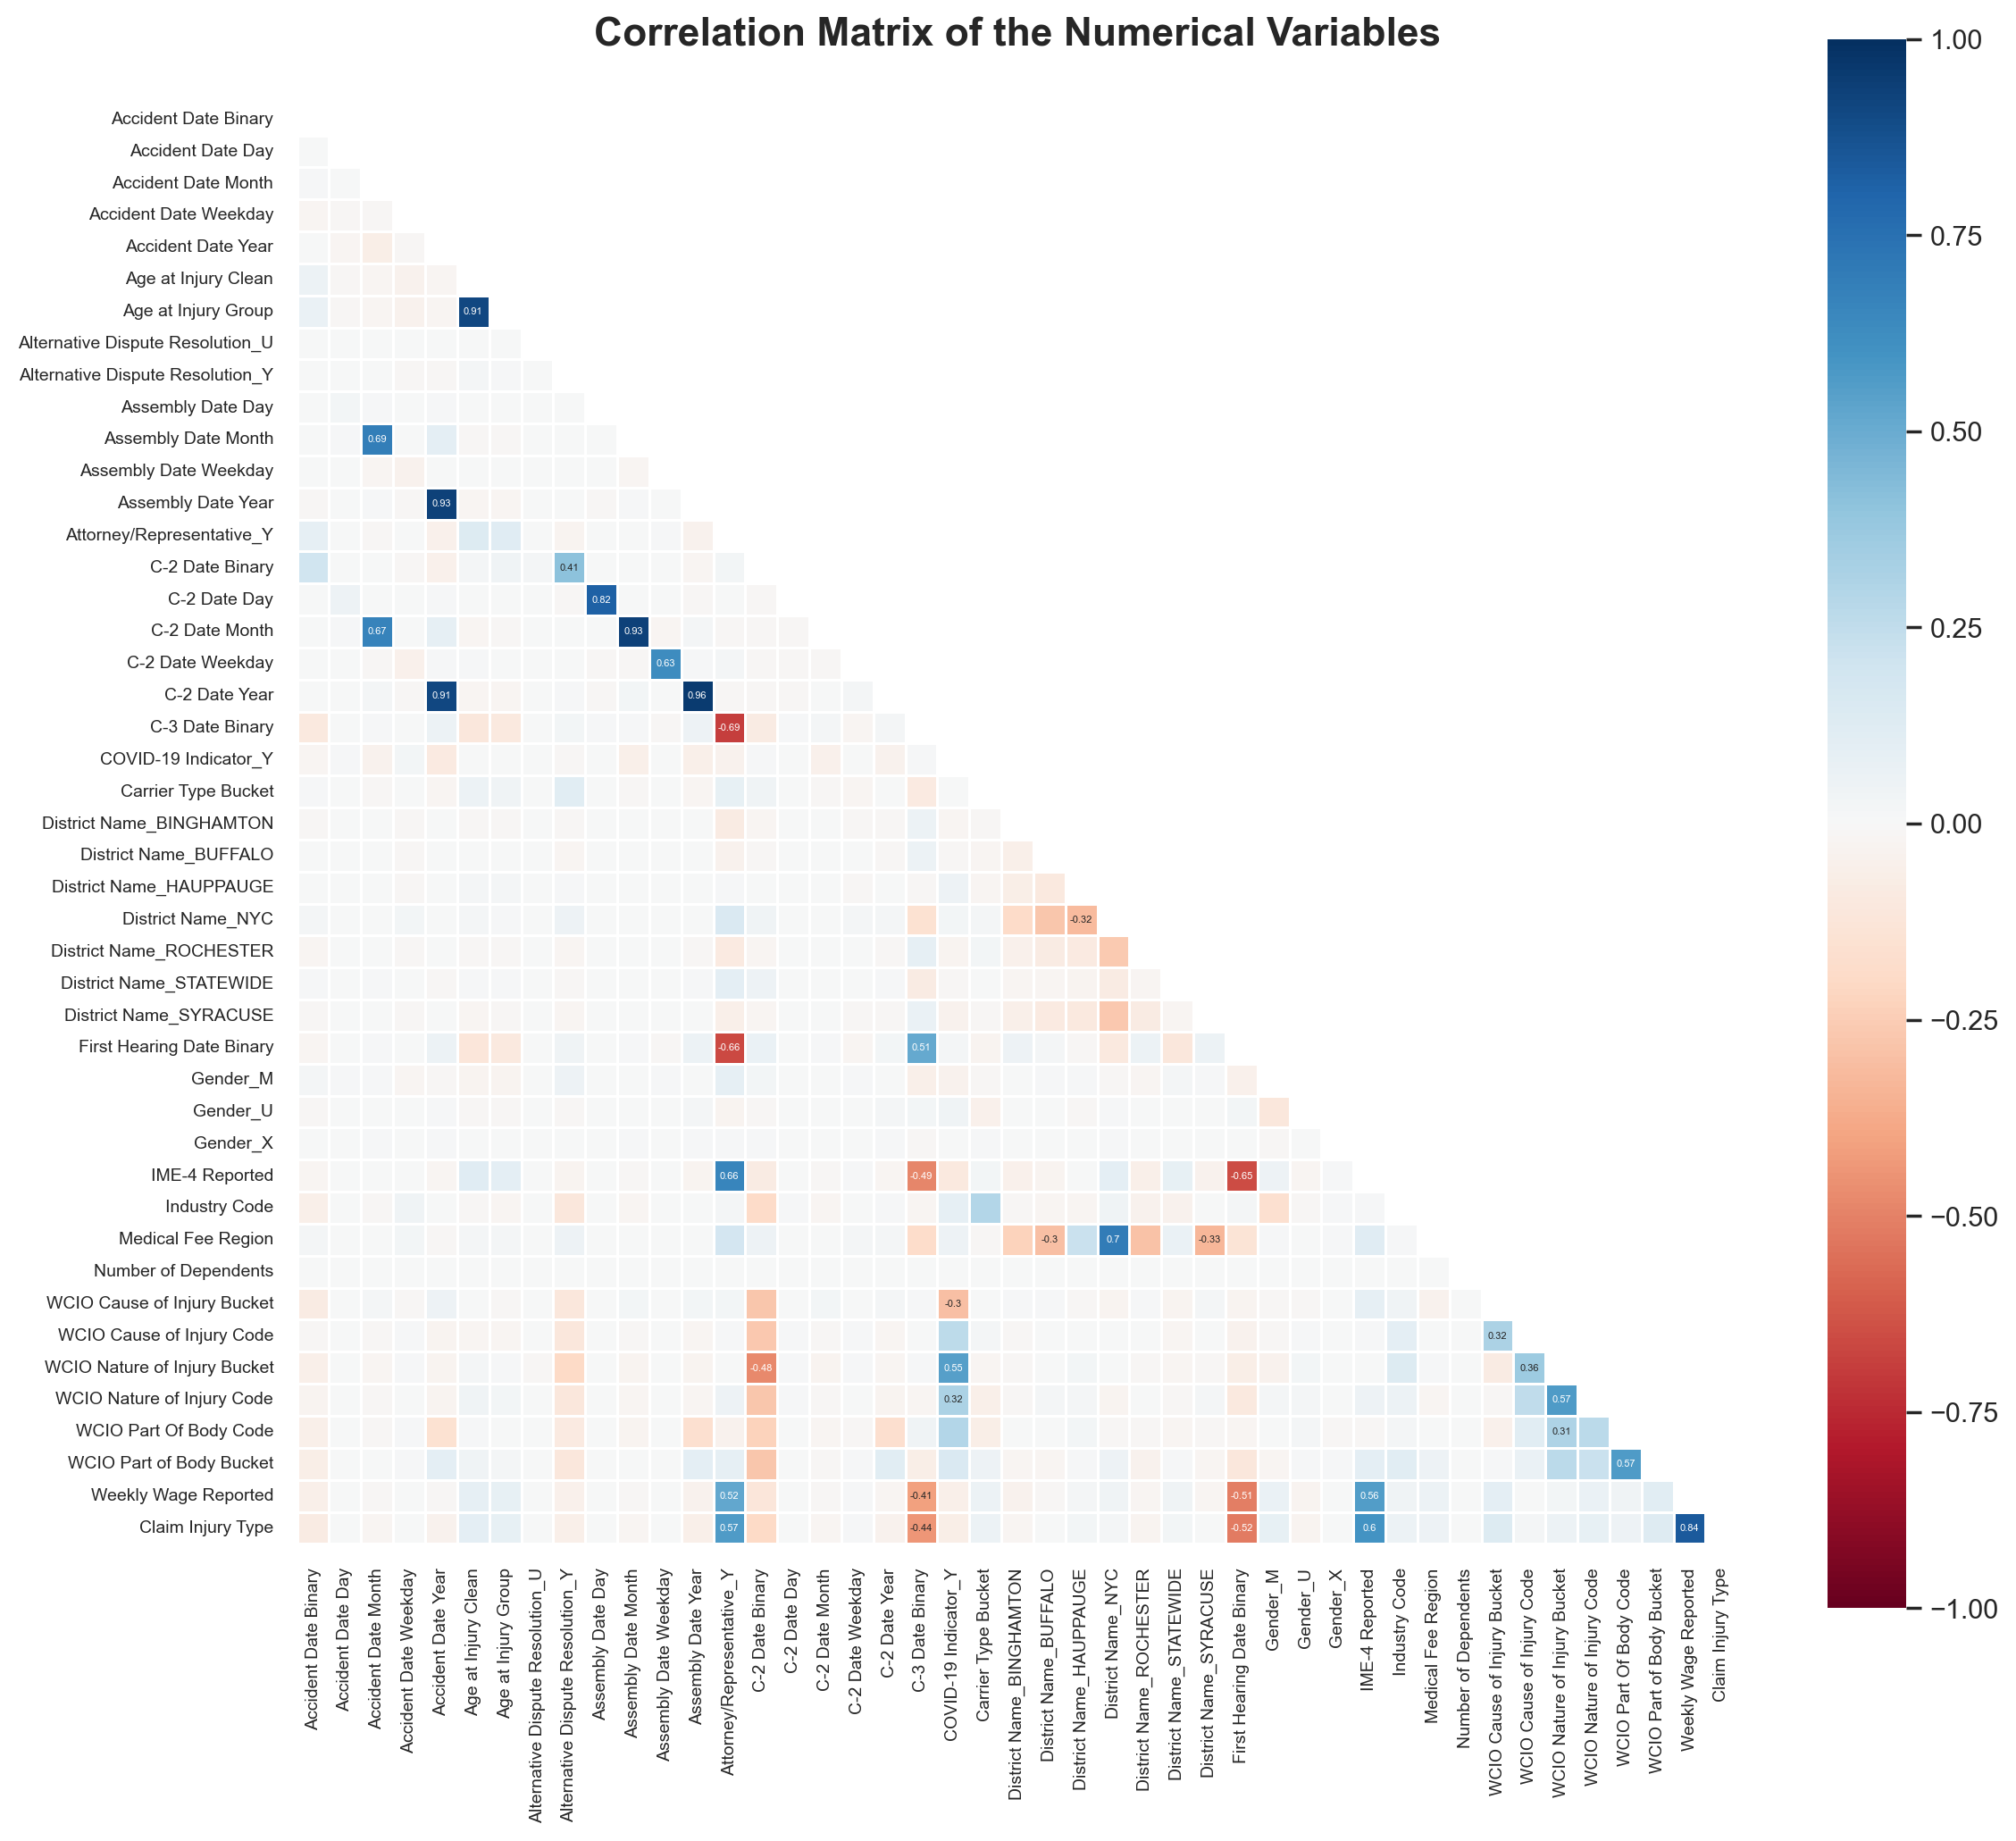

In [127]:
# ---------------------- Spearman Correlation [Heatmap] ----------------------
# Show only high or low values: values above |0.3| will appear annotated in the plot
mask_annot = np.absolute(cor_spearman.values) >= 0.3
annot = np.where(mask_annot, cor_spearman.values, np.full(cor_spearman.shape,""))

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.zeros_like(cor_spearman, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# # Create a custom diverging palette from red (-1) to white (0) to green (1)
# cmap = sns.diverging_palette(10, 130, s=100, l=50, n=9, center='light', as_cmap=True)

# Plot the correlation matrix as a Heatmap
fig = plt.figure(figsize=(12, 12))
sns.heatmap(cor_spearman,
            mask=mask,      # Hide the upper triangle
            cmap='RdBu',    # Colot Palette
            annot=annot,    # Show only VERY high or VERY low values
            fmt='s',        # fmt='s' -> string format
            # annot=True,     # Show all values
            annot_kws={'fontsize':4}, cbar_kws={'shrink':0.8},
            vmin=-1, vmax=1, center=0, linewidths=0.5, square=True)

plt.title('Correlation Matrix of the Numerical Variables\n', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Spearman_Correlation_Matrix_Numerical_AfterFeatureEngineering.png', dpi=300, bbox_inches='tight')
plt.show()

###### **Additional Correlation Analysis**

In [128]:
# Get dummy variables for the target variable
y_train_ohe = pd.get_dummies(y_train)

# Create a temporary DataFrame to calculte the correlation between the features and each one of classes of the target variable (One-Hot Encoded)
temp_df = pd.concat([X_train, y_train, y_train_ohe], axis=1)

In [130]:
# Correlation - Categortical Target ['Claim Injury Type'] VS Numerical Predictors [ETA Squared Correlation]
# Source: https://www.analyticsvidhya.com/blog/2022/08/statistical-effect-size-and-python-implementation/
import dython
import itertools

# Source: https://www.analyticsvidhya.com/blog/2022/08/statistical-effect-size-and-python-implementation/
# Calculate the ETA Squared correlation matrix
def cat_cont(df, categorical_features, continuous_features):
    """
    :param df: DataFrame containing the dataset.
    :param categorical_features: List of column names in df representing categorical features.
    :param continuous_features: List of column names in df representing continuous features.
    :return: DataFrame containing the correlation ratio between categorical and continuous features.
    """
    eta_corr = []
    for pair in itertools.product(categorical_features, continuous_features):
        try:
            # Remove NAs values from the two columns before calculating correlation
            clean_data = df[[pair[0], pair[1]]].dropna()

            # Calculate the ETA Squared correlation
            eta = dython.nominal.correlation_ratio(clean_data[pair[0]], clean_data[pair[1]])

            # Append the ETA Squared correlation to the list
            eta_corr.append(eta)
        except ValueError:
            eta_corr.append(0)
    eta_corr = np.array(eta_corr).reshape(len(categorical_features),len(continuous_features))
    eta_corr = pd.DataFrame(eta_corr, index=categorical_features, columns=continuous_features)
    return eta_corr

# Calculate the ETA Squared correlation matrix for the categorical and Target variable
eta_squared_correlation = cat_cont(temp_df, 
                                   continuous_features= X_train.select_dtypes('int64').columns,
                                   categorical_features= list(list(y_train_ohe.columns) + ['Claim Injury Type']))
eta_squared_correlation = eta_squared_correlation.round(2)

ModuleNotFoundError: No module named 'dython'

In [ ]:
eta_squared_correlation.rename(index={v: k for k, v in claim_injury_type_dict.items()}, inplace=True)   # Rename the index
eta_squared_correlation

,Accident Date Day,Accident Date Month,Accident Date Weekday,Accident Date Year,Age at Injury Clean,Age at Injury Group,Assembly Date Day,Assembly Date Month,Assembly Date Weekday,Assembly Date Year,C-2 Date Day,C-2 Date Month,C-2 Date Weekday,C-2 Date Year,Carrier Type Bucket,Industry Code,Medical Fee Region,Number of Dependents,WCIO Cause of Injury Bucket,WCIO Cause of Injury Code,WCIO Nature of Injury Bucket,WCIO Nature of Injury Code,WCIO Part Of Body Code,WCIO Part of Body Bucket
1. CANCELLED,0.00,0.00,0.00,0.07,0.03,0.06,0.0,0.00,0.00,0.00,0.01,0.00,0.00,0.03,0.02,0.14,0.04,0.0,0.19,0.13,0.19,0.12,0.13,0.18
2. NON-COMP,0.00,0.01,0.01,0.04,0.10,0.08,0.0,0.01,0.00,0.03,0.00,0.01,0.01,0.02,0.03,0.02,0.05,0.0,0.08,0.02,0.02,0.02,0.02,0.08
3. MED ONLY,0.00,0.00,0.00,0.04,0.00,0.00,0.0,0.01,0.00,0.04,0.00,0.00,0.00,0.04,0.02,0.04,0.02,0.0,0.05,0.00,0.01,0.01,0.02,0.03
4. TEMPORARY,0.00,0.00,0.00,0.03,0.05,0.04,0.0,0.01,0.00,0.00,0.00,0.01,0.00,0.02,0.03,0.04,0.03,0.0,0.08,0.00,0.04,0.08,0.04,0.10
5. PPD SCH LOSS,0.00,0.02,0.00,0.02,0.07,0.05,0.0,0.03,0.00,0.08,0.00,0.03,0.02,0.03,0.07,0.13,0.04,0.0,0.06,0.03,0.01,0.03,0.02,0.04
6. PPD NSL,0.00,0.01,0.00,0.01,0.03,0.03,0.0,0.01,0.00,0.04,0.00,0.01,0.00,0.03,0.01,0.01,0.01,0.0,0.02,0.00,0.00,0.01,0.01,0.01
7. PTD,0.00,0.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0.01,0.00,0.00,0.00
8. DEATH,0.00,0.01,0.01,0.01,0.03,0.02,0.0,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.0,0.02,0.02,0.04,0.03,0.02,0.01
Claim Injury Type,0.01,0.02,0.01,0.09,0.12,0.11,0.0,0.03,0.01,0.10,0.01,0.04,0.02,0.07,0.08,0.19,0.07,0.0,0.23,0.14,0.19,0.14,0.14,0.21


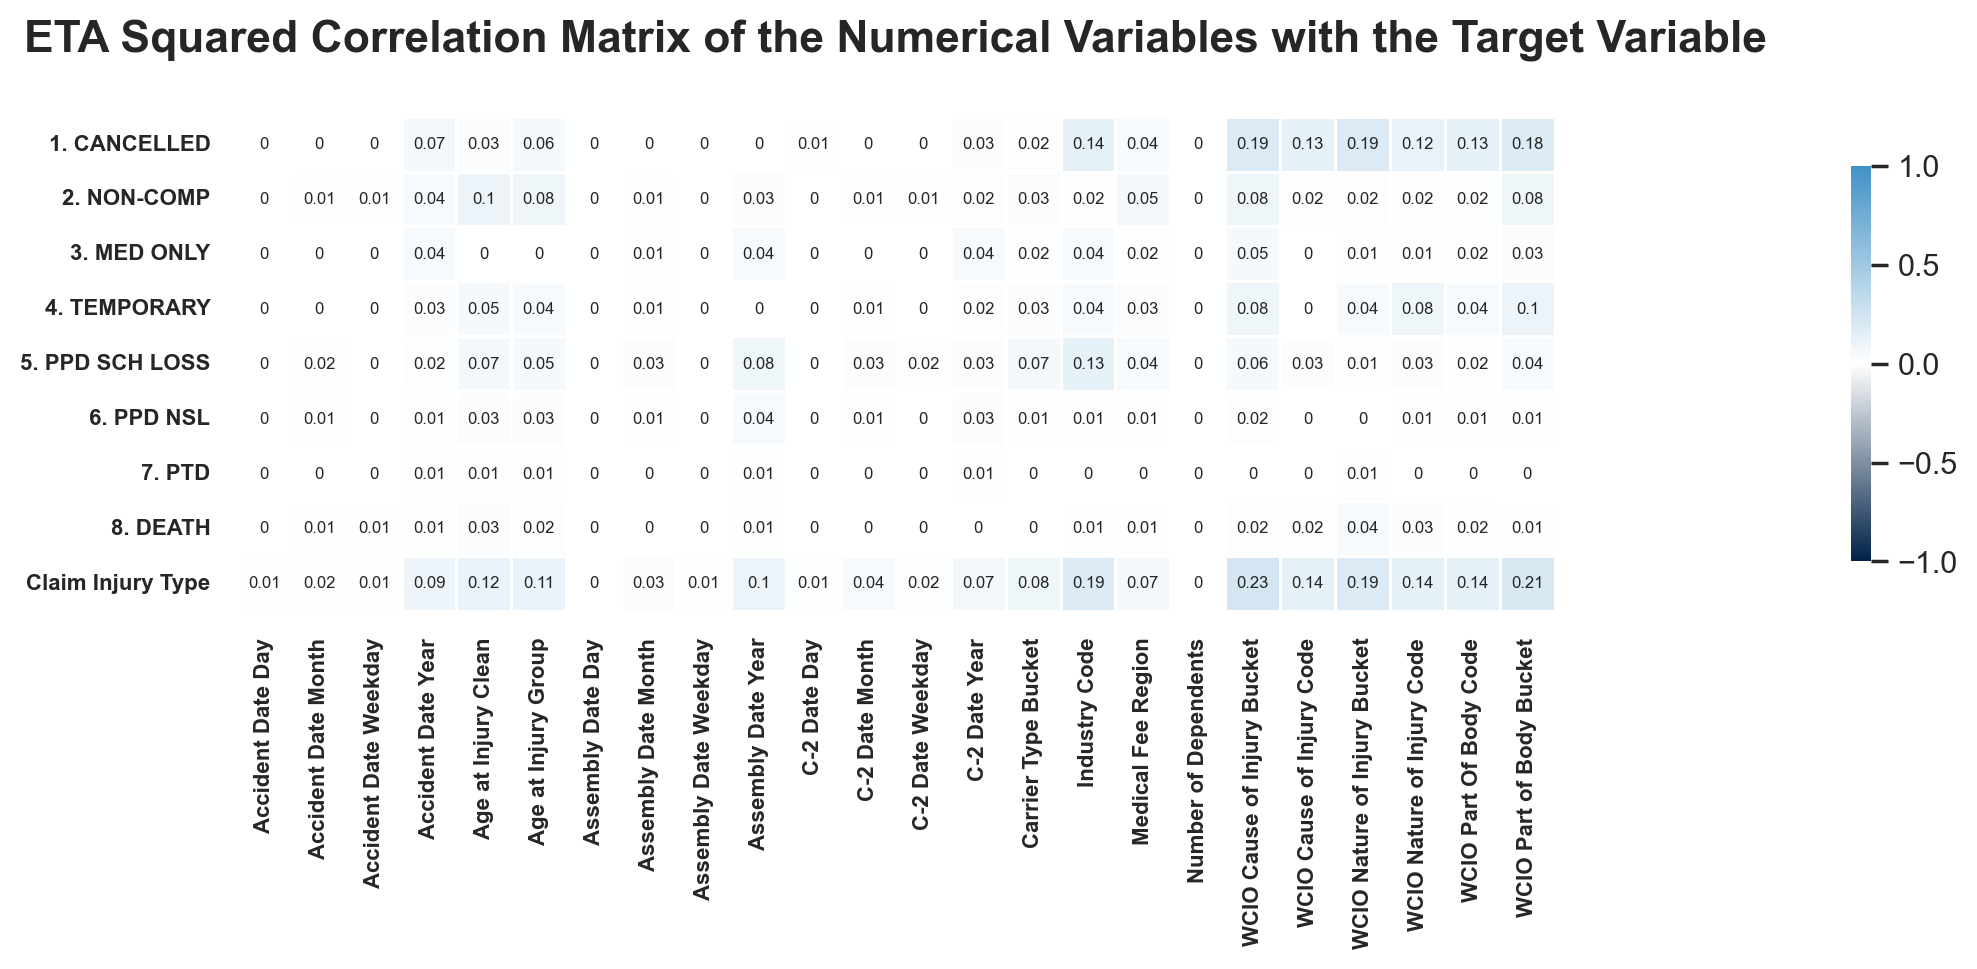

In [ ]:
# ---------------------- ETA Squared Correlation for each class of the Target Variable [Heatmap] ----------------------
# Show only high or low values: values above |0.3| will appear annotated in the plot
mask_annot = np.absolute(eta_squared_correlation.values) >= 0.3
annot = np.where(mask_annot, eta_squared_correlation.values, np.full(eta_squared_correlation.shape,""))

# Create a custom diverging palette from red (-1) to white (0) to green (1)
blue_white_blue_cmap = mcolors.LinearSegmentedColormap.from_list("blue_white_blue", 
    [(0, '#002147'),    # Dark blue for -1
     (0.5, '#FFFFFF'),  # White for 0
     (1, '#4292C6')],   # Lighter blue for 1
    N=256)

# Plot the correlation matrix as a Heatmap
fig = plt.figure(figsize=(30,5))
sns.heatmap(eta_squared_correlation,
            cmap= blue_white_blue_cmap,    # Color Palette 
            # annot=annot,                   # Show only VERY high or VERY low values
            # fmt='s',        # fmt='s' -> string format
            annot=True,     # Show all values
            annot_kws={'fontsize':6}, cbar_kws={'shrink':0.8},
            vmin=-1, vmax=1, center=0, linewidths=0.5, square=True)

plt.title('ETA Squared Correlation Matrix of the Numerical Variables with the Target Variable\n', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.tight_layout()
fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/ETA_Squared_Correlation_Matrix_Numerical_TargetVariable.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Calculate the Cramer's V correlation matrix
# Source: https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
import scipy.stats as ss

def cramers_v(var1,var2):
    """
    Calculate Cramers V statistic for categorial-categorial association.
    uses correction from Bergsma and Wicher, Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(var1,var2).values
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Building of the matrix
rows= []

cat_bin_data = pd.concat([y_train, y_train_ohe, X_train.select_dtypes('int32')], axis=1)

for var1 in cat_bin_data:
  col = []
  for var2 in cat_bin_data :
    cramers =cramers_v(cat_bin_data[var1], cat_bin_data[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
  rows.append(col)

cramers_results = np.array(rows)
cramers_results_df = pd.DataFrame(cramers_results, columns = cat_bin_data.columns, index =cat_bin_data.columns)
cramers_results_df.rename(index={v: k for k, v in claim_injury_type_dict.items()}, inplace=True)    # Rename the index
cramers_results_df.rename(columns={v: k for k, v in claim_injury_type_dict.items()}, inplace=True)   # Rename the columns
cramers_results_df[:9] # Show only the correlation with the target variable

,Claim Injury Type,1. CANCELLED,2. NON-COMP,3. MED ONLY,4. TEMPORARY,5. PPD SCH LOSS,6. PPD NSL,7. PTD,8. DEATH,Accident Date Binary,Alternative Dispute Resolution_U,Alternative Dispute Resolution_Y,Attorney/Representative_Y,C-2 Date Binary,C-3 Date Binary,COVID-19 Indicator_Y,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,District Name_SYRACUSE,First Hearing Date Binary,Gender_M,Gender_U,Gender_X,IME-4 Reported,Weekly Wage Reported
Claim Injury Type,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.17,0.0,0.07,0.61,0.49,0.47,0.10,0.05,0.02,0.05,0.06,0.04,0.05,0.02,0.54,0.10,0.03,0.01,0.62,0.87
1. CANCELLED,1.0,1.00,0.15,0.06,0.09,0.05,0.01,0.00,0.00,0.17,0.0,0.01,0.03,0.49,0.04,0.01,0.01,0.00,0.00,0.03,0.02,0.01,0.01,0.03,0.02,0.01,0.00,0.07,0.11
2. NON-COMP,1.0,0.15,1.00,0.37,0.60,0.31,0.09,0.01,0.03,0.01,0.0,0.07,0.53,0.00,0.42,0.08,0.02,0.01,0.04,0.01,0.04,0.03,0.00,0.49,0.08,0.03,0.00,0.51,0.77
3. MED ONLY,1.0,0.06,0.37,1.00,0.22,0.11,0.03,0.00,0.01,0.02,0.0,0.02,0.00,0.06,0.02,0.03,0.03,0.02,0.04,0.04,0.02,0.00,0.01,0.05,0.00,0.01,0.01,0.03,0.01
4. TEMPORARY,1.0,0.09,0.60,0.22,1.00,0.18,0.05,0.01,0.02,0.03,0.0,0.04,0.33,0.09,0.26,0.02,0.02,0.00,0.01,0.01,0.01,0.03,0.00,0.34,0.04,0.02,0.00,0.35,0.65
5. PPD SCH LOSS,1.0,0.05,0.31,0.11,0.18,1.00,0.03,0.00,0.01,0.02,0.0,0.02,0.39,0.05,0.29,0.07,0.03,0.00,0.01,0.03,0.02,0.00,0.02,0.26,0.07,0.02,0.00,0.39,0.37
6. PPD NSL,1.0,0.01,0.09,0.03,0.05,0.03,1.00,0.00,0.00,0.01,0.0,0.01,0.12,0.01,0.09,0.02,0.01,0.01,0.00,0.01,0.01,0.02,0.00,0.14,0.00,0.00,0.00,0.15,0.10
7. PTD,1.0,0.00,0.01,0.00,0.01,0.00,0.00,0.99,0.00,0.00,0.0,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.00,0.00,0.02,0.02
8. DEATH,1.0,0.00,0.03,0.01,0.02,0.01,0.00,0.00,1.00,0.00,0.0,0.00,0.04,0.00,0.01,0.04,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.05,0.02,0.00,0.00,0.00,0.02


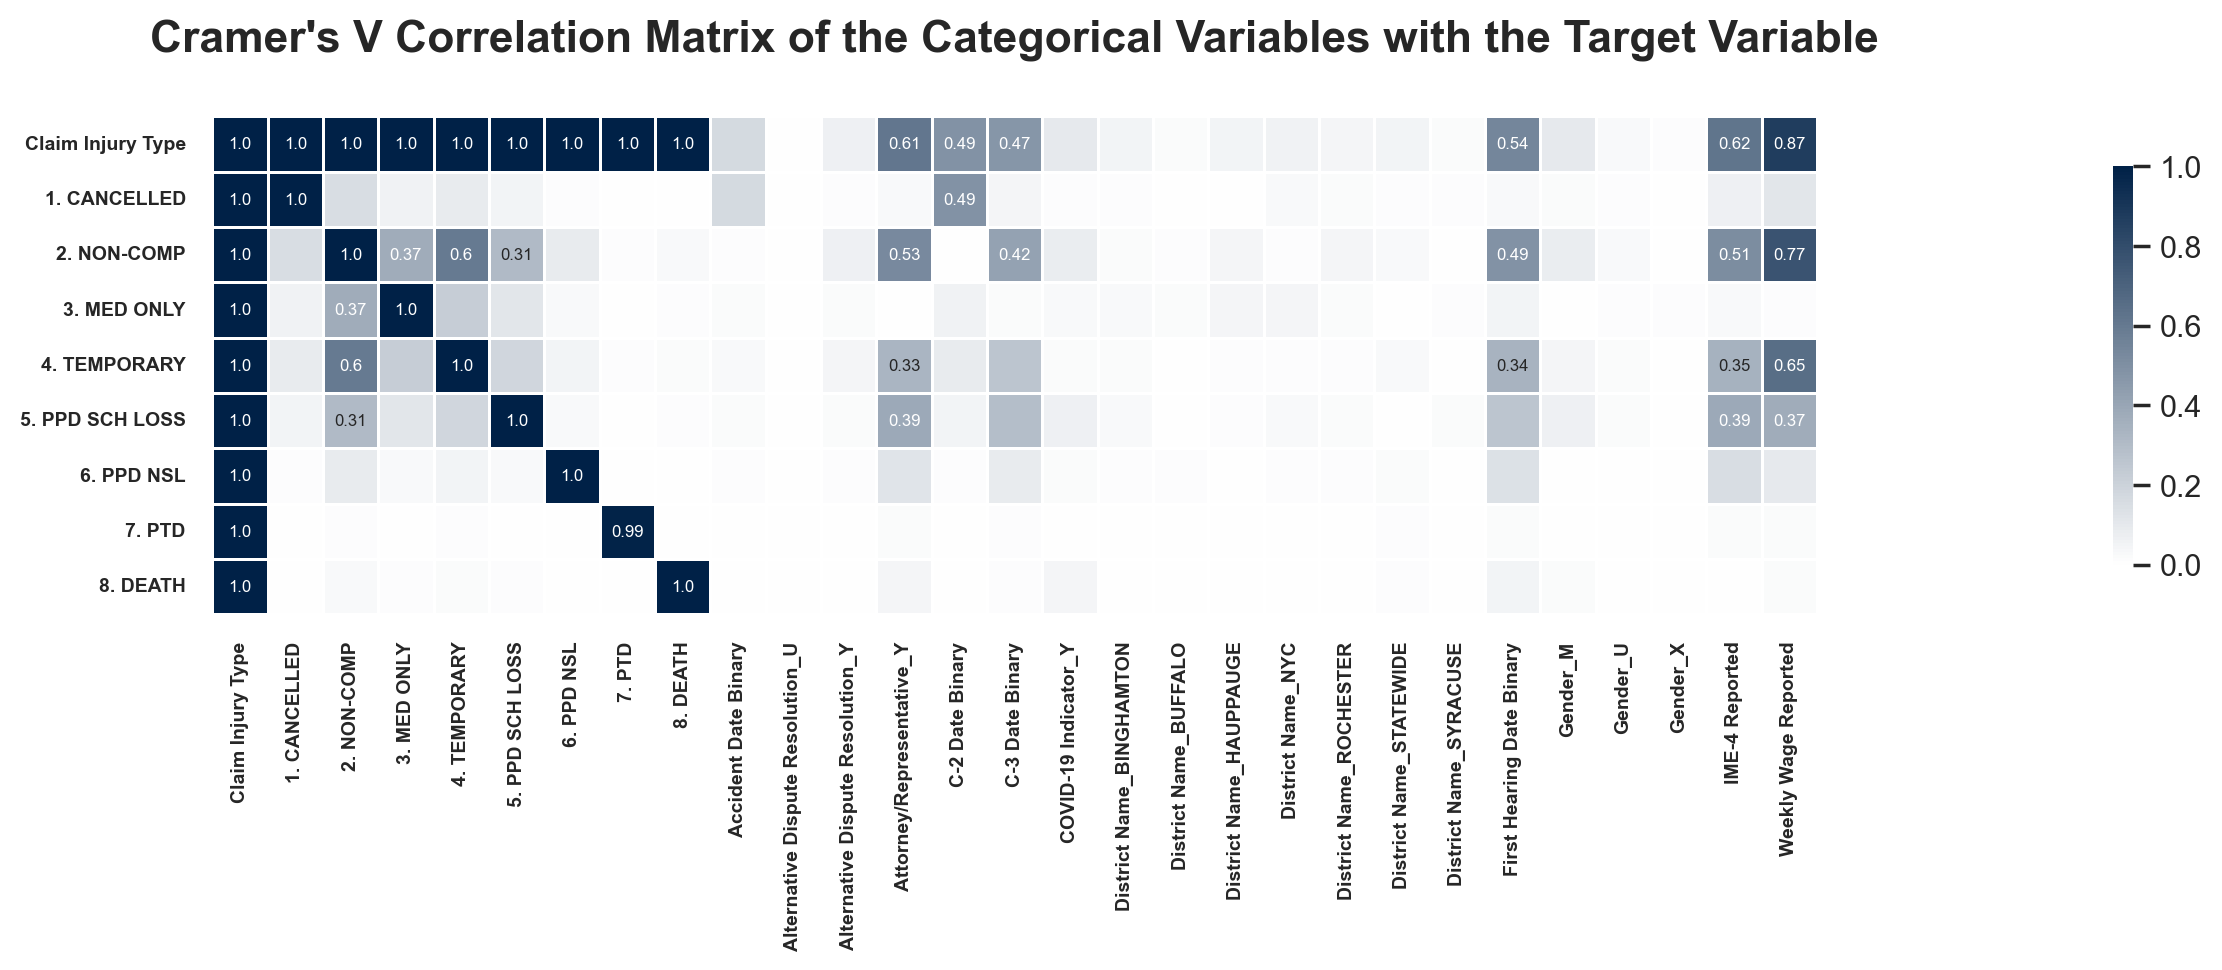

In [ ]:
# ---------------------- Cramer's V Correlation for each class of the Target Variable [Heatmap] ----------------------
# Show only high or low values: values above |0.3| will appear annotated in the plot
mask_annot = np.absolute(cramers_results_df[:9].values) >= 0.3
annot = np.where(mask_annot, cramers_results_df[:9].values, np.full(cramers_results_df[:9].shape,""))

# Create a custom diverging palette
blue_white_blue_cmap = mcolors.LinearSegmentedColormap.from_list("blue_white_blue", 
    [(0,   '#4292C6'),    # Lighter blue for -1
     (0.5, '#FFFFFF'),    # White for 0
     (1,   '#002147')],   # Dark blue for 1
    N=256)

# Plot the correlation matrix as a Heatmap
fig = plt.figure(figsize=(30,5))
sns.heatmap(cramers_results_df[:9],        # Show only the correlation with the target variable
            cmap= blue_white_blue_cmap,    # Color Palette 
            annot=annot,                   # Show only VERY high or VERY low values
            fmt='s',        # fmt='s' -> string format
            # annot=True,     # Show all values
            annot_kws={'fontsize':6}, cbar_kws={'shrink':0.8},
            vmin=0, vmax=1, center=0, linewidths=0.5, square=True)

plt.title("Cramer's V Correlation Matrix of the Categorical Variables with the Target Variable\n", fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=7, fontweight='bold')
plt.yticks(fontsize=7, fontweight='bold')
plt.tight_layout()
fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Crames_V_Correlation_Matrix_Categorical_TargetVariable.png', dpi=300, bbox_inches='tight')
plt.show()

##### **Chi-Square Test** <sup>[**[6]**](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)</sup> <a class='anchor' id='chi-square-test'></a>

In [131]:
def TestIndependence(X,y,var,alpha=0.01):        
    """
    Test the independence of a categorical variable with respect to the target variable using the Chi-Square test.

    Parameters:
    X (pd.Series): The categorical variable to be tested.
    y (pd.Series): The target variable.
    var (str): The name of the variable being tested.
    alpha (float, optional): The significance level to determine if the variable is important. Default is 0.05.

    Returns:
    None: Prints whether the variable is important for prediction or not based on the Chi-Square test.
    """
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [132]:
# Apply the TestIndependence function to all categorical variables
for var in X_train[binary_columns]:
    TestIndependence(X_train[var], y_train, var, alpha=0.05)

Accident Date Binary is IMPORTANT for Prediction
C-2 Date Binary is IMPORTANT for Prediction
C-3 Date Binary is IMPORTANT for Prediction
First Hearing Date Binary is IMPORTANT for Prediction
COVID-19 Indicator_Y is IMPORTANT for Prediction
Alternative Dispute Resolution_U is NOT an important predictor. (Discard Alternative Dispute Resolution_U from model)
Alternative Dispute Resolution_Y is IMPORTANT for Prediction
Attorney/Representative_Y is IMPORTANT for Prediction
Gender_M is IMPORTANT for Prediction
Gender_U is IMPORTANT for Prediction
Gender_X is IMPORTANT for Prediction
District Name_BINGHAMTON is IMPORTANT for Prediction
District Name_BUFFALO is IMPORTANT for Prediction
District Name_HAUPPAUGE is IMPORTANT for Prediction
District Name_NYC is IMPORTANT for Prediction
District Name_ROCHESTER is IMPORTANT for Prediction
District Name_STATEWIDE is IMPORTANT for Prediction
District Name_SYRACUSE is IMPORTANT for Prediction
IME-4 Reported is IMPORTANT for Prediction
Weekly Wage Repor

In [133]:
# Apply the TestIndependence function to validate to compare the results
for var in X_val[binary_columns]:
    TestIndependence(X_val[var], y_val, var, alpha=0.05)

Accident Date Binary is IMPORTANT for Prediction
C-2 Date Binary is IMPORTANT for Prediction
C-3 Date Binary is IMPORTANT for Prediction
First Hearing Date Binary is IMPORTANT for Prediction
COVID-19 Indicator_Y is IMPORTANT for Prediction
Alternative Dispute Resolution_U is NOT an important predictor. (Discard Alternative Dispute Resolution_U from model)
Alternative Dispute Resolution_Y is IMPORTANT for Prediction
Attorney/Representative_Y is IMPORTANT for Prediction
Gender_M is IMPORTANT for Prediction
Gender_U is IMPORTANT for Prediction
Gender_X is NOT an important predictor. (Discard Gender_X from model)
District Name_BINGHAMTON is IMPORTANT for Prediction
District Name_BUFFALO is IMPORTANT for Prediction
District Name_HAUPPAUGE is IMPORTANT for Prediction
District Name_NYC is IMPORTANT for Prediction
District Name_ROCHESTER is IMPORTANT for Prediction
District Name_STATEWIDE is IMPORTANT for Prediction
District Name_SYRACUSE is IMPORTANT for Prediction
IME-4 Reported is IMPORTANT

In [ ]:
X_train.head()

,Accident Date Binary,Accident Date Day,Accident Date Month,Accident Date Weekday,Accident Date Year,Age at Injury Clean,Age at Injury Group,Alternative Dispute Resolution_U,Alternative Dispute Resolution_Y,Assembly Date Day,Assembly Date Month,Assembly Date Weekday,Assembly Date Year,Attorney/Representative_Y,C-2 Date Binary,C-2 Date Day,C-2 Date Month,C-2 Date Weekday,C-2 Date Year,C-3 Date Binary,COVID-19 Indicator_Y,Carrier Type Bucket,District Name_BINGHAMTON,District Name_BUFFALO,District Name_HAUPPAUGE,District Name_NYC,District Name_ROCHESTER,District Name_STATEWIDE,District Name_SYRACUSE,First Hearing Date Binary,Gender_M,Gender_U,Gender_X,IME-4 Reported,Industry Code,Medical Fee Region,Number of Dependents,WCIO Cause of Injury Bucket,WCIO Cause of Injury Code,WCIO Nature of Injury Bucket,WCIO Nature of Injury Code,WCIO Part Of Body Code,WCIO Part of Body Bucket,Weekly Wage Reported
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6094685,0,22,9,3,2022,47,3,0,0,27,9,1,2022,0,0,27,9,1,2022,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,56,0,6,5,32,1,49,53,5,0
5535751,0,5,8,2,2020,52,3,0,0,13,8,3,2020,1,0,17,8,0,2020,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,62,3,3,9,75,1,59,20,2,1
5715773,0,3,5,0,2021,63,4,0,0,5,5,2,2021,0,0,5,5,2,2021,1,0,2,0,0,0,1,0,0,0,1,0,0,0,0,62,3,4,7,53,1,52,42,4,0
5765474,0,7,7,2,2021,71,4,0,0,13,7,1,2021,1,0,12,7,0,2021,0,0,3,0,0,0,1,0,0,0,0,0,0,0,1,92,3,3,7,53,1,52,90,6,1
6130855,0,8,11,1,2022,28,2,0,0,10,11,3,2022,0,0,9,11,2,2022,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,44,3,3,9,80,1,10,57,5,0


# X_train does NOT have updated encoded values. I.e. WCIO codes are still treated as ordinal instead of one-hot encoded. Question: Does having these variables improperly encoded as ordinal affect feature selection? Feature selection approach in general?

### **Wrapper Methods**

##### **Recursive Feature Elimination (RFE)** <sup>[**[7]**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)</sup> <a class='anchor' id='rfe'></a>

In [134]:
# Apply MinMaxScaler to the training, validation and test data [Just for cases where RFE model is appropriate]
# We will apply the MinMaxScaler to numerical and categorical variables
# Source: https://stats.stackexchange.com/questions/266359/do-we-ever-normalize-categorical-variables-does-it-make-any-sense
#         https://stats.stackexchange.com/questions/399430/does-categorical-variable-need-normalization-standardization

# We choose MinMaxScaler because it preserves the binary nature of the data
minmax_scaler = MinMaxScaler().fit(X_train)
X_train_norm = pd.DataFrame(minmax_scaler.transform(X_train), 
                                        columns = X_train.columns, 
                                        index = X_train.index)
X_validation_norm = pd.DataFrame(minmax_scaler.transform(X_val), 
                                            columns = X_val.columns, 
                                            index = X_val.index)

X_test_norm = pd.DataFrame(minmax_scaler.transform(test_data), 
                                       columns = test_data.columns, 
                                       index = test_data.index)

################ [EXTRA: We can try Feature Selection with other types of scalers] #################
# Apply StandardScaler to the training, validation and test data
standard_scaler = StandardScaler().fit(X_train)
X_train_stand = pd.DataFrame(standard_scaler.transform(X_train),
                                        columns = X_train.columns,
                                        index = X_train.index)
X_validation_stand = pd.DataFrame(standard_scaler.transform(X_val),
                                              columns = X_val.columns,
                                              index = X_val.index)
X_test_stand = pd.DataFrame(standard_scaler.transform(test_data),
                                        columns = test_data.columns,
                                        index = test_data.index)
######################################################################################################


> Since we have a large number of binary variables, we will use **Normalization** in RFE to avoid lose the binary nature of the variables ($0$ or $1$).

In [ ]:
# Check the first rows of the norm training set
# X_train_norm.head(2)
# X_train_stand.head(2)

In [ ]:
print('Min:', X_train_norm.min().min(), 'Max:', X_train_norm.max().max())
print('Min:', X_validation_norm.min().min(), 'Max:', X_validation_norm.max().max())
print('Min:', X_test_norm.min().min(), 'Max:', X_test_norm.max().max())               
# It's normal to have values greater than 1 because we have new categories in the test set that were not present in the training set

Min: 0.0 Max: 1.0
Min: 0.0 Max: 1.0
Min: -0.3928571428571388 Max: 2.0


> Since ***Kaggle's benchmark*** is **`F1-Score (Macro)`**, we will use this method to select the most important variables for the model in **RFE (Recursive Feature Elimination)**.

> For compare different models/scaler methods, we will use **RFE** to select the best features for each model and put the results in a **[Excel File](./ML_Excel_ReportResults.xlsx)** to compare them.

In [135]:
# -------------------------------------- [RFE] --------------------------------------
# No of features
nof_list = np.arange(1, len(X_train_stand.columns) + 1)    # No of features (all aranged from 1 to n_features)          
                                                                      #### Change to enc_norm or enc_log 

high_score = 0                                                        # Variable to store the highest score 

# Variable to store the optimum features
nof = 0
train_score_list = []
val_score_list = []

# Loop to select the best no of features [RFE]
for n in tqdm(range(len(nof_list))):

    # Model to test - For our 1st approach - [Logistic Regression, Naive Bayes (Categorical + Gaussian) , KNN (Brute + KDTree + BallTree)]
    # Logistic Regression - Can be used 
    # Naive Bayes - CategoricalNB - Cannot be used [because the model don't have a coef_ or feature_importances_ attribute]
    # Naive Bayes - GaussianNB - Cannot be used [because the model don't have a coef_ or feature_importances_ attribute]
    # KNN - Cannot be used [because the model don't have a coef_ or feature_importances_ attribute]
    # Source: https://stackoverflow.com/questions/59342197/models-to-use-for-recursive-feature-elimination-for-classification-and-regressio

    # Model to test - [Logistic Regression] - Our 1st approach (11.11.2024)
    # Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    # model = LogisticRegression(max_iter=100,              # Maximum number of iterations taken for the solvers to converge (default=100)
    #                            solver='lbfgs',            # Algorithm to use in the optimization problem (default='lbfgs' - can handle multiclasses)
    #                            random_state=2024)         # Seed for the random number generator (for reproducibility purposes)

    # Model to test - For our 2nd approach - [Logistic Regression, Decision Tree, Random Forest, Gradient Boosting]
    # Although we haven't yet learned these algorithms, so we will not use them for now (as requested in the homework/project guidelines)
    # If you want to use them, you can uncomment the lines below
    model = DecisionTreeClassifier(criterion='entropy', max_depth = 20, min_samples_split= 50, random_state=2024)    # Decision Tree
    
    # model = RandomForestClassifier()
    # model = GradientBoostingClassifier()  
    
    # RFE 
    rfe = RFE(estimator = model,
              n_features_to_select = nof_list[n])

    # Fit the model
    X_train_rfe = rfe.fit_transform(X_train_stand, y_train)               ### Change to enc_norm or enc_log 
    X_val_rfe = rfe.transform(X_validation_stand)                         ### Change to enc_norm or enc_log 
    model.fit(X_train_rfe,y_train)
    
    # Storing results on training data - We will choose the best score based on F1-Score       
    pred_train = model.predict(X_train_rfe)
    train_score = metrics.f1_score(y_train, pred_train, average='macro')
    train_score_list.append(train_score)
    
    # Storing results on training data
    pred_val = model.predict(X_val_rfe)
    val_score = metrics.f1_score(y_val, pred_val, average='macro')
    val_score_list.append(val_score)
    
    # Check best score
    if (val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]

        # Features to select (adding mention of variables to keep)
        features_to_select = pd.Series(rfe.support_, index = X_train_stand.columns)    ### Change to enc_norm or enc_log 

## Time of Execution RFE: 1h 12min 20s [11.11.2024 - Logistic Regression]
## Time of Execution RFE: 1h 12m 13s [Decision Tree]

100%|██████████| 44/44 [1:54:07<00:00, 155.62s/it]  


In [136]:
# Print the optimum number of features and the score with that number of features
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print("\nFeatures to select:")

# Show the features to select
results_rfe = features_to_select.to_frame()
results_rfe.index.name = 'Feature'
results_rfe.columns = ['Selected']
results_rfe.sort_index(inplace=True)
results_rfe

Optimum number of features: 40
Score with 40 features: 0.408128

Features to select:


,Selected
Feature,
Accident Date Binary,True
Accident Date Day,True
Accident Date Month,True
Accident Date Weekday,True
Accident Date Year,True
Age at Injury Clean,True
Age at Injury Group,True
Alternative Dispute Resolution_U,False
Alternative Dispute Resolution_Y,True


In [ ]:
# Save the results of the RFE - Excel file with Model's name
results_rfe.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/RFE_Results_DecisionTree_MiniMaxScaler_17.11.2024.xlsx')     ### Change file name

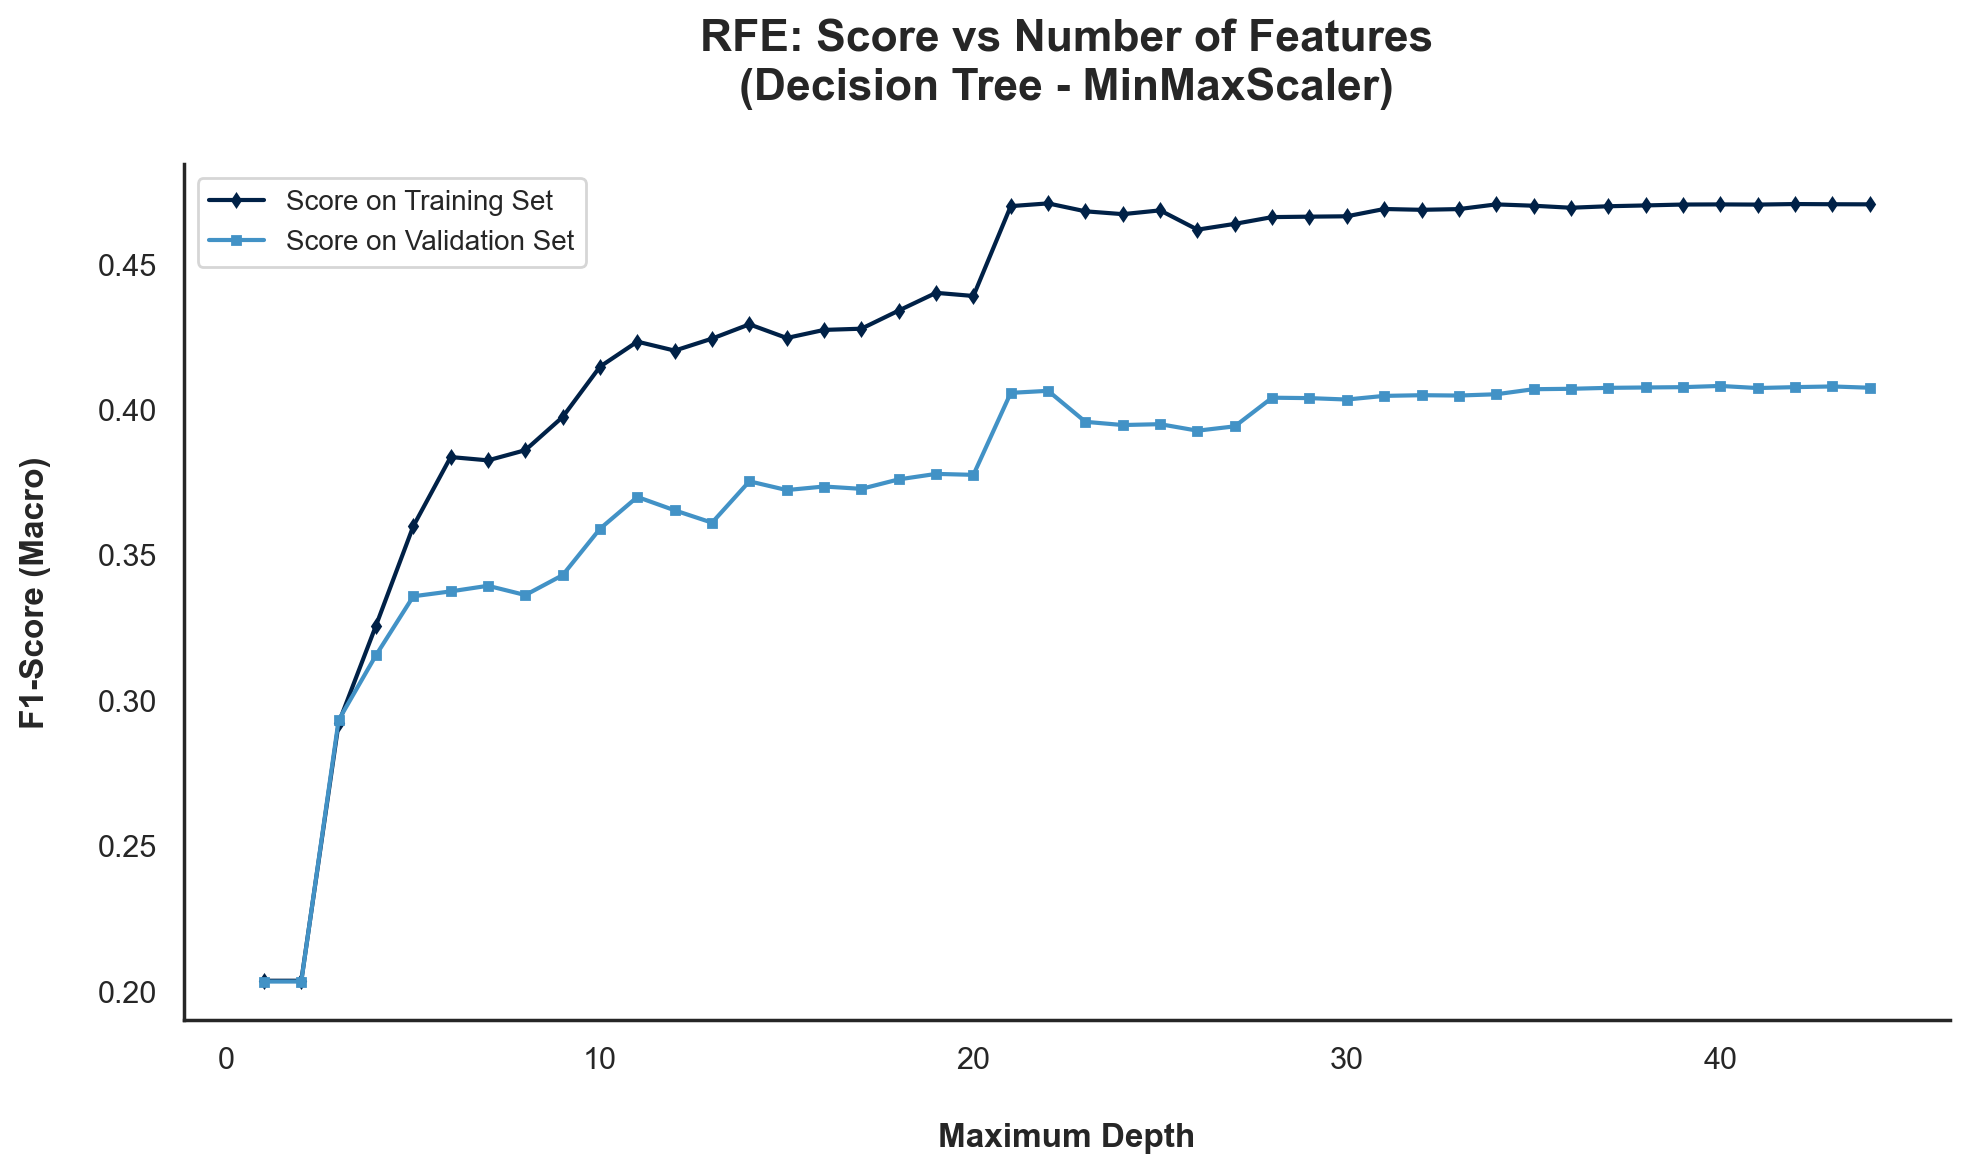

In [ ]:
# Plot the results of the RFE
fig = plt.figure(figsize=(10,6))
plt.plot(list(range(1,len(X_train_norm.columns) + 1)), train_score_list, label="Score on Training Set", color='#002147', marker='d', markersize=3)
plt.plot(list(range(1,len(X_train_norm.columns) + 1)), val_score_list, label="Score on Validation Set", color='#4292C6', marker='s', markersize=3)

# Customizing the plot
plt.title("RFE: Score vs Number of Features\n(Decision Tree - MinMaxScaler)\n", fontsize=16, fontweight='bold')
plt.xlabel("\nMaximum Depth", fontsize=12, fontweight='bold')
plt.ylabel("F1-Score (Macro)\n", fontsize=12, fontweight='bold')
plt.legend(loc='best', fontsize=10, frameon=True)

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/RFE_Score_vs_Number_of_Features__DecisionTree_MiniMaxScaler_17.11.2024.png', 
            dpi=300, bbox_inches='tight') ############# Change file name
plt.show()

---

### **Embedded Methods** <sup>[**[8]**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)</sup>  <sup>[**[9]**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)</sup> <a class='anchor' id='embedded-methods'></a>
<a class='anchor' id='embedded-methods'></a>

#### **Ridge Regression** (L2 Regularization) <sup>[**[10]**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)</sup> <a class='anchor' id='ridge-regression-l2-regularization'></a>

<br>

$$\text{Ridge Regression} = \text{Linear Regression} + \text{L2 Regularization}$$

<br> **Cost Function for Ridge Regression:**

$$\text{Cost Function} = \sum_{i=1}^{M} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{M} (y_i - \sum_{j=1}^{p} w_j \times x_{ij})^2 + \lambda \sum_{j=1}^{p} w_j^2$$

The Ridge Regression is a linear regression model that uses the L2 regularization technique. It is used to prevent overfitting and as a result, it helps to improve the model's accuracy. The L2 regularization adds a penalty equal to the square of the magnitude of the coefficients.

The objective of the Ridge Regression is to minimize the cost function $\text{sum of squared residuals}$ plus the **L2 regularization term** ($\lambda \times \text{the \; slope}^2$).

Where $\lambda$ is the regularization parameter.
- $\lambda$ can range from 0 to positive infinity
- $\lambda=0$ then Ridge regression is same as Least Squares
- Increasing $\lambda$ will promote a smaller slope (asymptotically to zero)
- How to choose $\lambda$
  - CV to determine the lowest variance
- Ridge Regression can solve for parameters when there is not enough data samples

<br><br>

---

#### **Lasso Regression** (Least Absolute Shrinkage and Selection operator) <sup>[**[11]**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)</sup> <a class='anchor' id='lasso-regression-least-absolute-shrinkage-and-selection-operator'></a>

<br>

$$\text{Lasso Regression} = \text{Linear Regression} + \text{L1 Regularization}$$

<br> Cost Function for LASSO Regression:

$$\text{Cost Function} = \sum_{i=1}^{M} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{M} (y_i - \sum_{j=1}^{p} w_j \times x_{ij})^2 + \lambda \sum_{j=1}^{p} |w_j|$$

The Lasso Regression is a linear regression model that uses the L1 regularization technique. It is used to prevent overfitting and as a result, it helps to improve the model's accuracy. The L1 regularization adds a penalty equal to the absolute value of the magnitude of the coefficients.

- Difference is instead of taking the square of the coefficients, magnitudes are taken into account.
- This type of regularization (**L1**) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output

<br>

---

In [137]:
#################################################### Embedded Methods ####################################################
## 1. Lasso Regularization - compare simple logistic regressions
## 2. Ridge Regularization - compare simple logistic regressions

# Assign the features to the X and y variables for the Lasso and Ridge Regularization
X = X_train_stand.values
y = y_train.values

# Feature names
feature_names = X_train_stand.columns

# Lasso Regularization
lasso_selector = SelectFromModel(estimator= linear_model.LogisticRegression(C=1,                               # Regularization strength
                                                                            penalty="l1",                      # Lasso
                                                                            solver='saga'),                    # Algorithm to use in the optimization problem
                                                                                                               # Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
                                                                            max_features=len(feature_names),   # Maximum number of features to select
                                                                            threshold="1.25*mean").fit(X,y)    # Threshold for feature selection (need to transform the coef_ values)

lasso_selected_features = feature_names[lasso_selector.get_support()]

# Assign the features to the X and y variables for the Lasso Regularization
# Source: https://stackoverflow.com/questions/75027483/why-sklearn-selectfrommodel-estimator-coef-return-a-2d-array
#         https://stackoverflow.com/questions/64581307/how-to-properly-do-feature-selection-with-selectfrommodel-from-scikit-learn
lasso_coef = pd.Series(abs(lasso_selector.estimator_.coef_).mean(axis=0)*1.25, index=feature_names)
lasso_imp_coef = lasso_coef.sort_values(ascending=True)

# Ridge Regularization
ridge_selector = SelectFromModel(estimator= linear_model.LogisticRegression(C=1,                               # Regularization strength
                                                                            penalty="l2",                      # Ridge
                                                                            solver='sag',                      # Algorithm to use in the optimization problem
                                                                            max_iter=1000),                    # Ensure convergence
                                                                            max_features=len(feature_names),   # Maximum number of features to select
                                                                            threshold="1.25*mean").fit(X, y)   # Threshold (need to transform the coef_ values)

ridge_selected_features = feature_names[ridge_selector.get_support()]

# Assign the coefficients to the selected features for the Ridge Regularization
ridge_coef = pd.Series(abs(ridge_selector.estimator_.coef_).mean(axis=0)*1.25, index=feature_names)
ridge_import_coef = ridge_coef.sort_values(ascending=True)

## Time of Execution Ridge and Lasso Regularization = 10m 10.3s

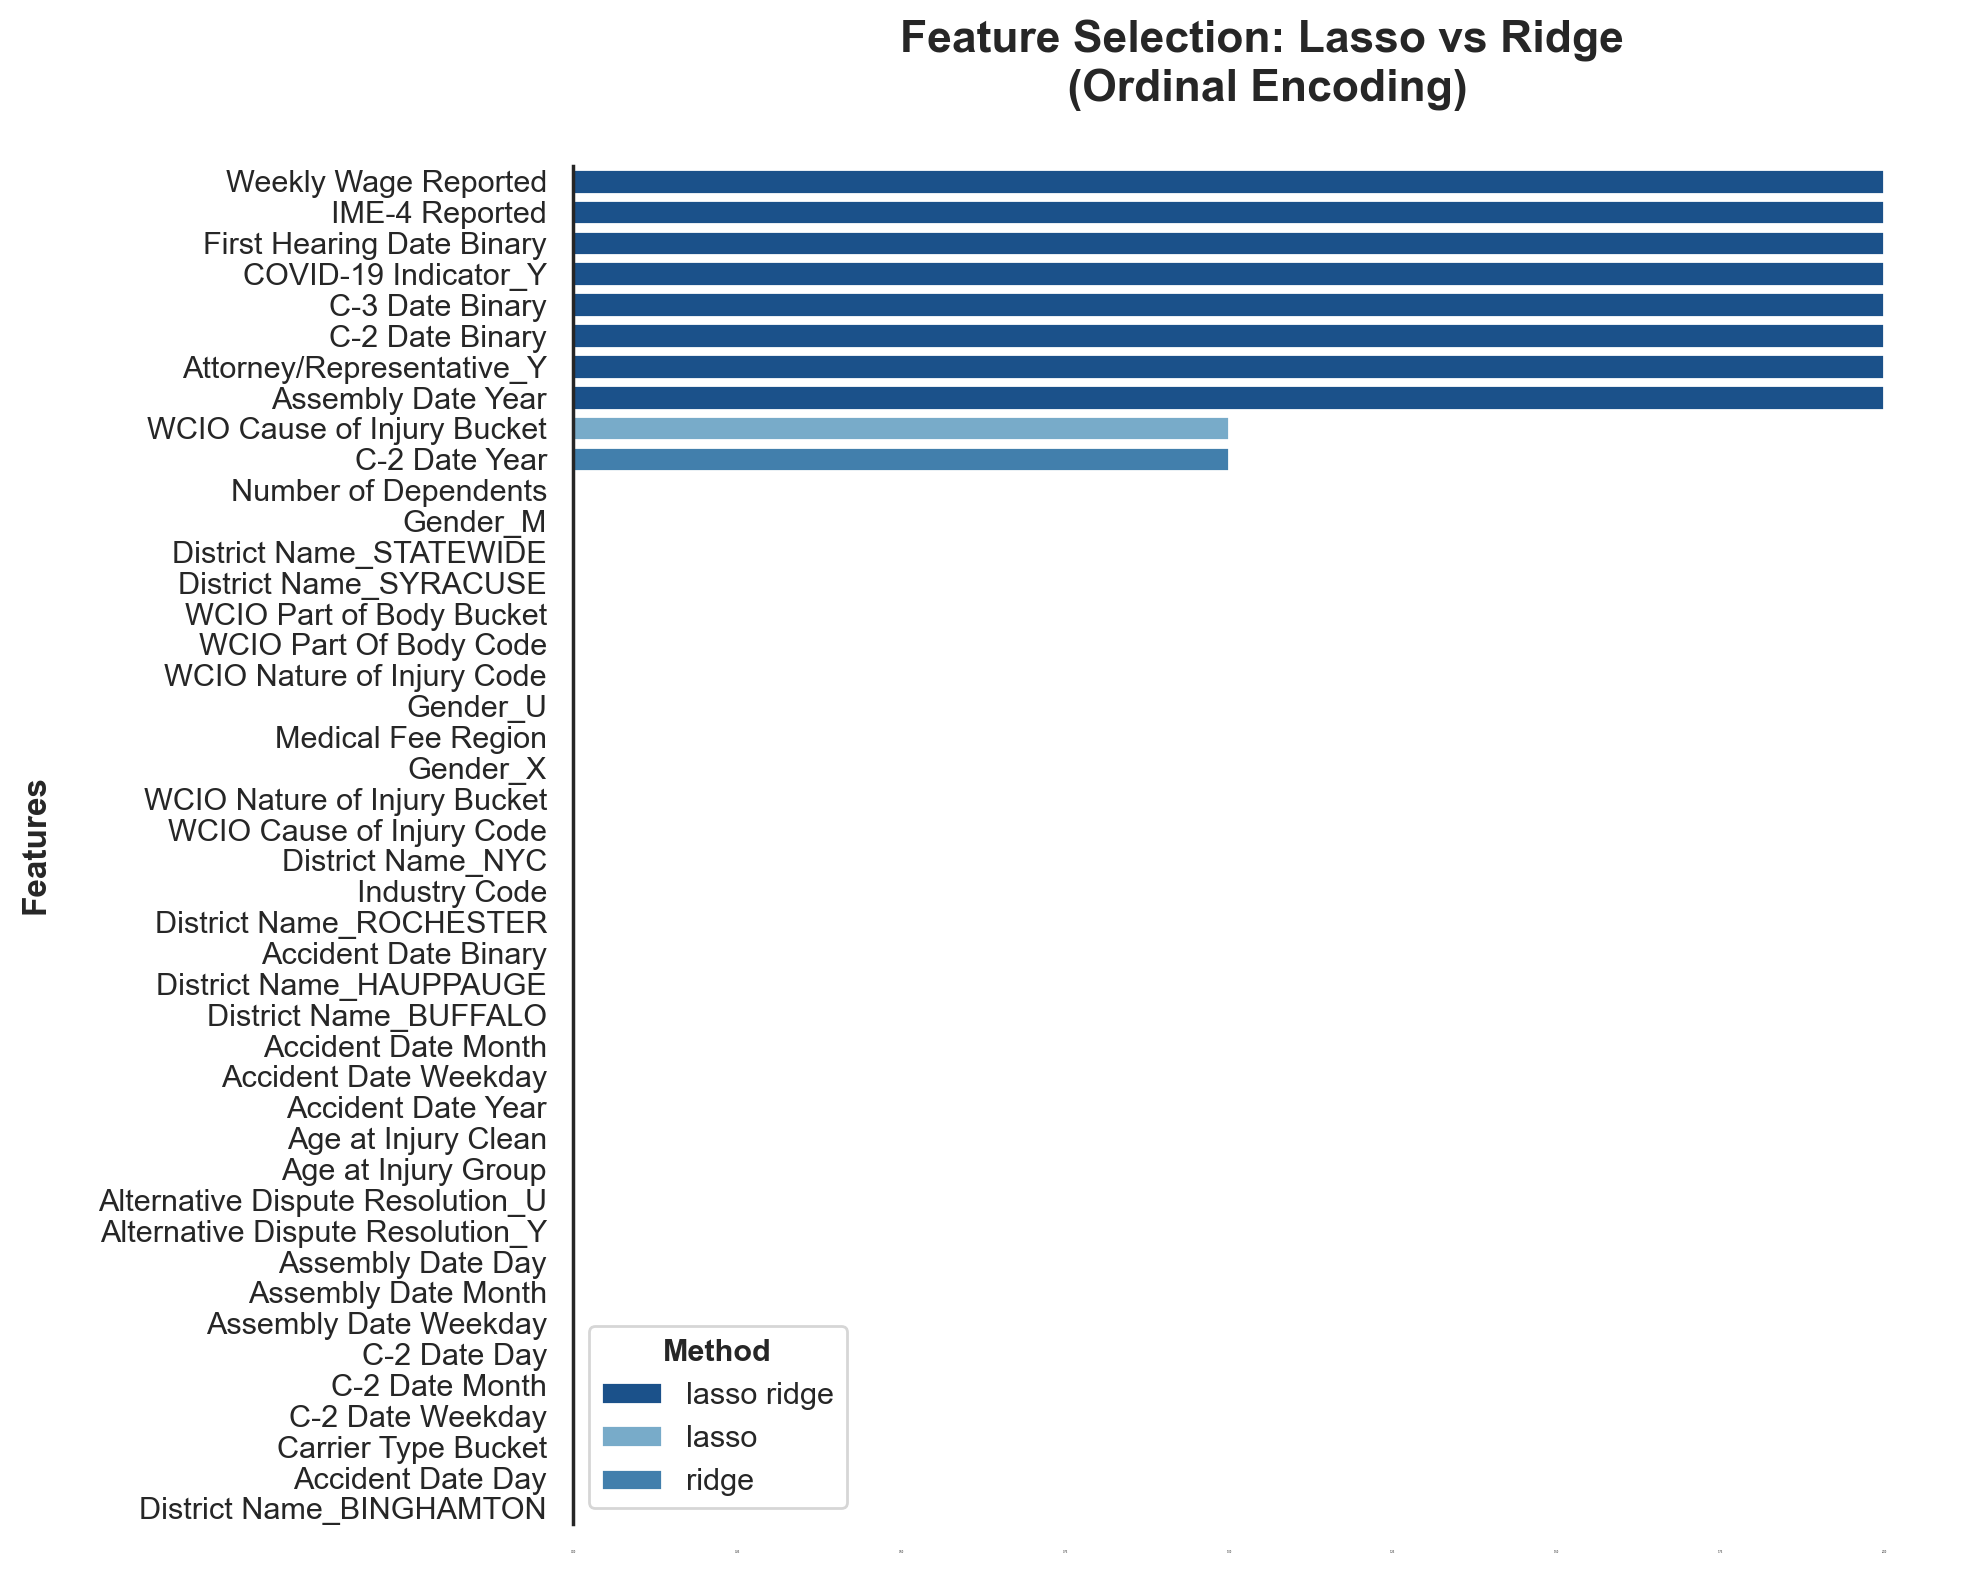

In [138]:

## Plot the results of the Lasso and Ridge Regularization
dtf_features = pd.DataFrame({"features": feature_names})
dtf_features["lasso"] = dtf_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)

dtf_features["ridge"] = dtf_features["features"].apply(lambda x: "ridge" if x in ridge_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in ridge_selected_features else 0)

dtf_features["method"] = dtf_features[["lasso", "ridge"]].apply(lambda x: (x[0] + " " + x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]

# plot
plt.figure(figsize=(10, 8))
sns.barplot(y="features", x="selection", hue="method", 
            data=dtf_features.sort_values("selection", ascending=False), dodge=False,
            palette={"lasso": "#6BAED6", "ridge": "#3182BD", 'lasso ridge':'#08519C'})

plt.title('Feature Selection: Lasso vs Ridge\n (Ordinal Encoding)\n', fontsize=16, fontweight='bold')
plt.ylabel('Features\n', fontsize=12, fontweight='bold')
plt.xlabel('')
plt.xticks(fontsize=0)
plt.legend(title="Method", fontsize='11', title_fontproperties={'weight':'bold', 'size':'11'})
sns.despine(top=True, right=True, bottom=True)
plt.tight_layout()
plt.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Lasso_vs_Ridge_MinMaxScaler_17.11.2024.png', dpi=300, bbox_inches='tight')
plt.show()

## Normal blue: Lasso
## light blue: Ridge
## Dark blue:  Both Lasso and Ridge

In [ ]:
# Dataframe with the abs. coefficients of the Lasso and Ridge Regularization
lasso_ridge_coef = pd.DataFrame({'Lasso': lasso_imp_coef, 'Ridge': ridge_import_coef})
lasso_ridge_coef = lasso_ridge_coef.sort_values(by = ['Lasso', 'Ridge'], ascending = [False, False])

# Save the results of the Lasso and Ridge Regularization - Excel file with Model's name
lasso_ridge_coef.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Lasso_Ridge_Coefficients_LogisticRegression_MinMaxScaler.xlsx')     ### Change file name
lasso_ridge_coef

,Lasso,Ridge
Feature,,
Weekly Wage Reported,1.226431,1.521710
IME-4 Reported,0.476424,0.694741
Attorney/Representative_Y,0.446268,0.648823
First Hearing Date Binary,0.323441,0.587542
COVID-19 Indicator_Y,0.268273,0.367995
C-2 Date Binary,0.260055,0.300632
Assembly Date Year,0.253133,0.453346
C-3 Date Binary,0.228569,0.494023
WCIO Cause of Injury Bucket,0.188648,0.235015


In [139]:
# Dataframe with the results
dtf_features.set_index('features', inplace=True)
dtf_features.sort_index(ascending=True, inplace=True)

# Save the results of the feature selection on Excel file - Ordinal Encoding
dtf_features.to_excel('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Feature_Selection_Results_LogisticRegression_ScaledData_17.11.2024.xlsx')     ### Change file name
dtf_features

,lasso,num1,ridge,num2,method,selection
features,,,,,,
Accident Date Binary,,0,,0,,0
Accident Date Day,,0,,0,,0
Accident Date Month,,0,,0,,0
Accident Date Weekday,,0,,0,,0
Accident Date Year,,0,,0,,0
Age at Injury Clean,,0,,0,,0
Age at Injury Group,,0,,0,,0
Alternative Dispute Resolution_U,,0,,0,,0
Alternative Dispute Resolution_Y,,0,,0,,0


# No change in feature selection using OHE instead of ordinal

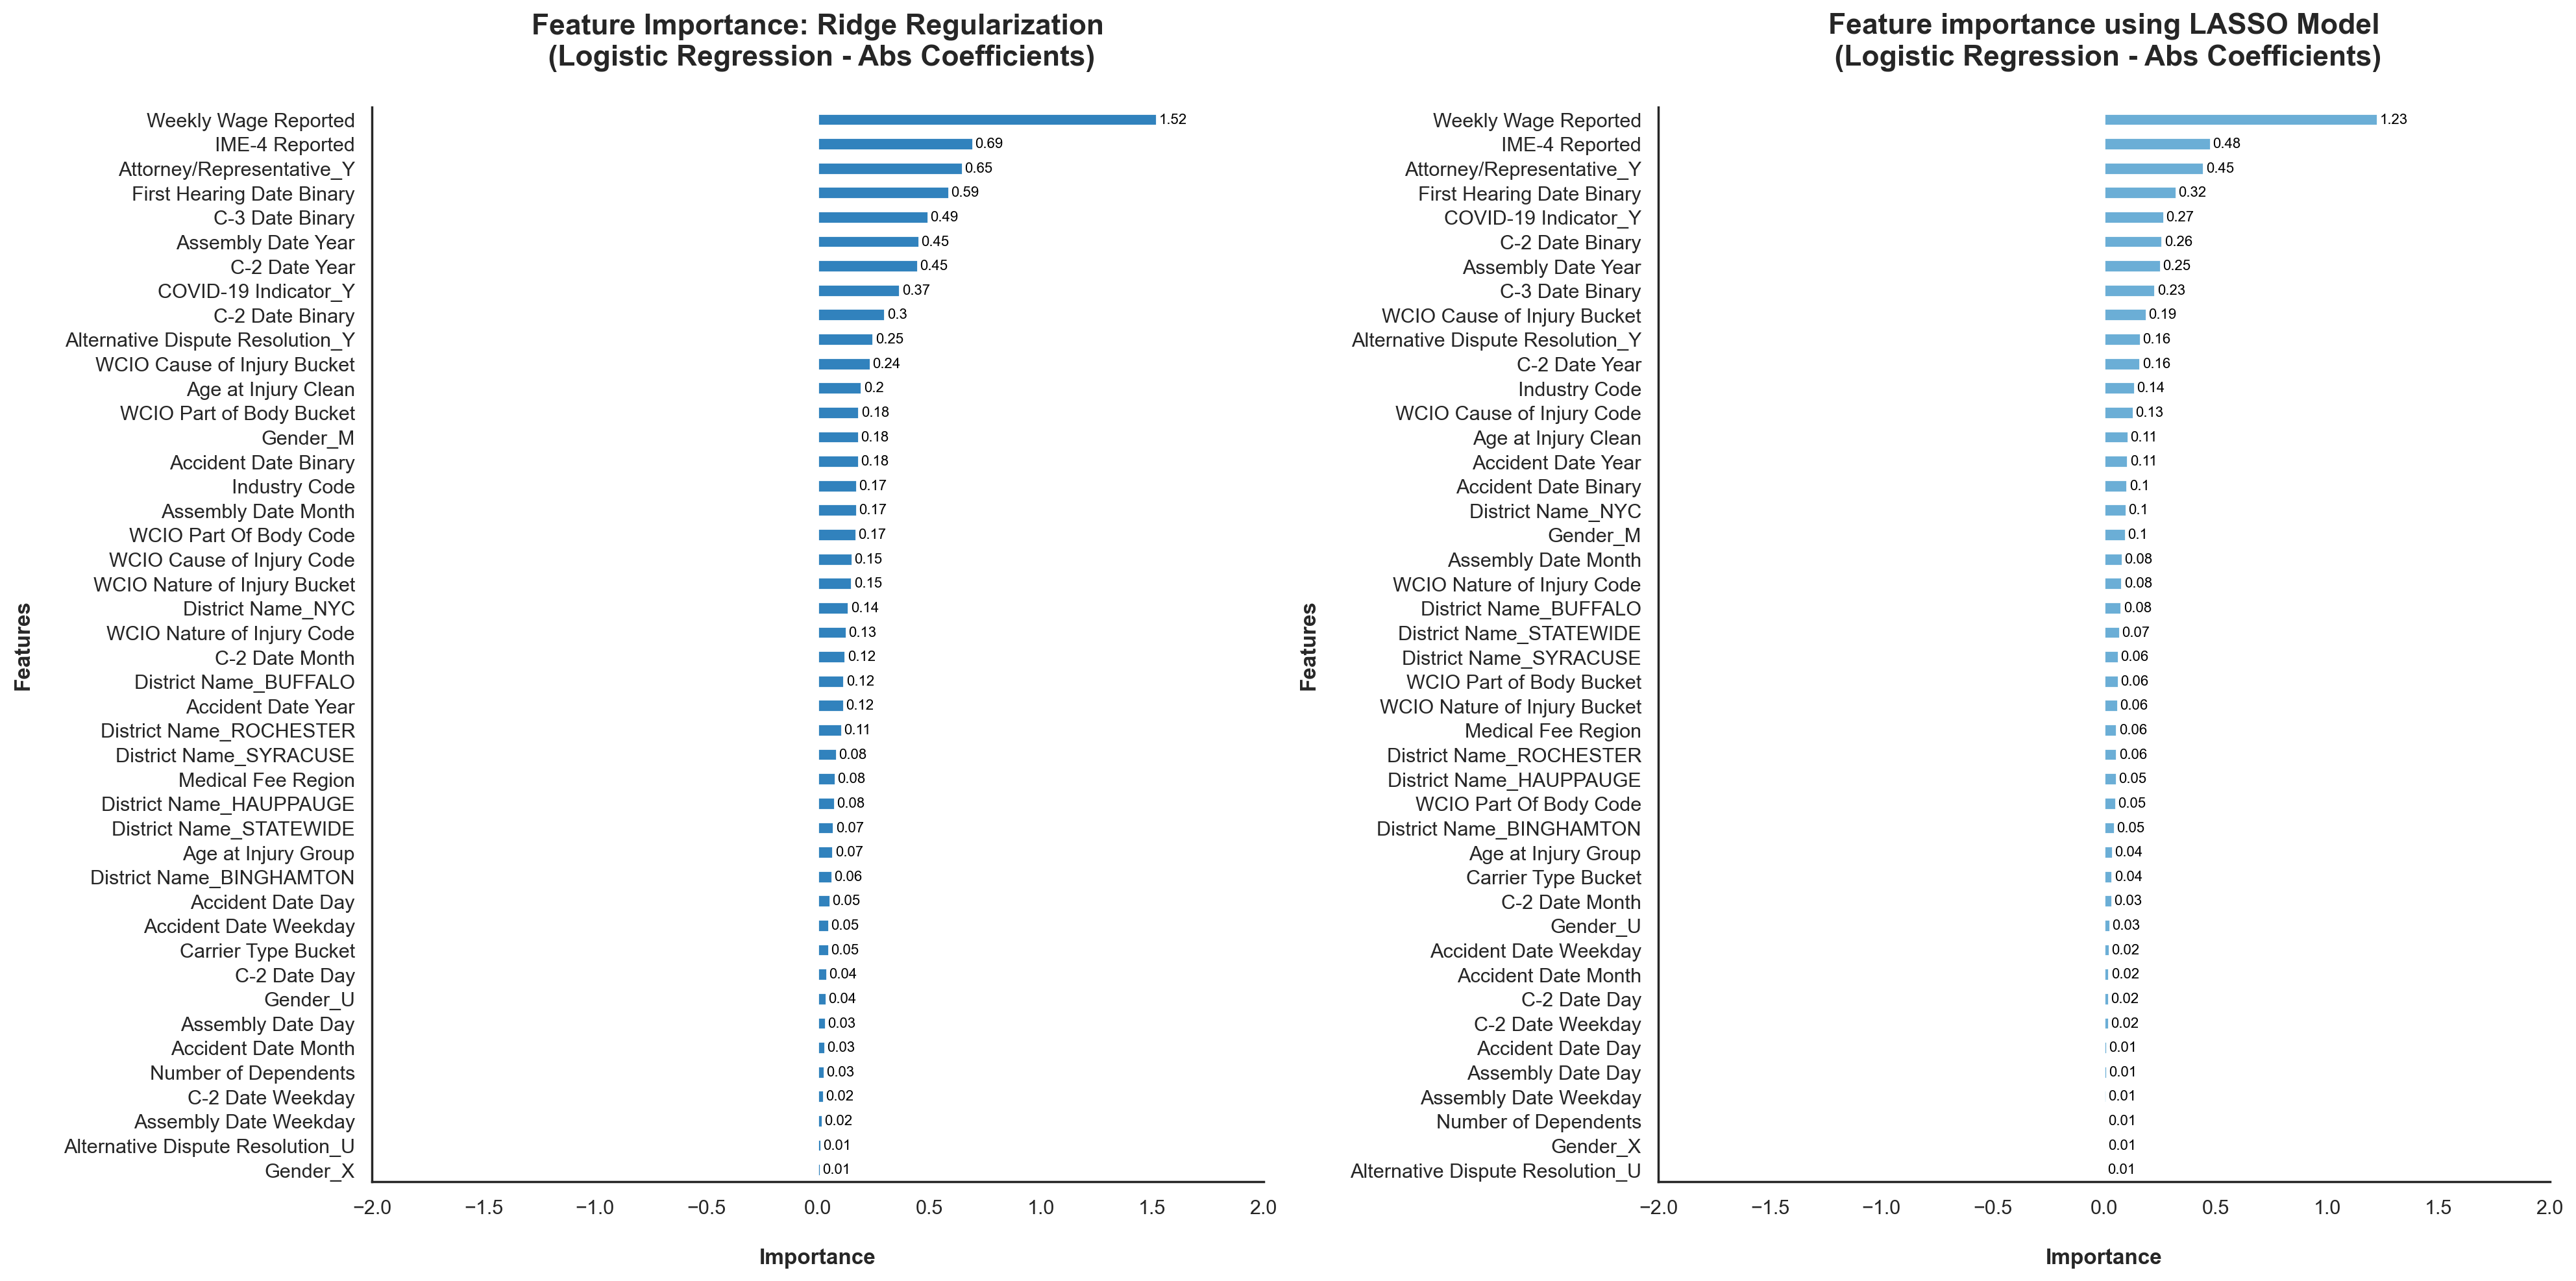

In [ ]:
# Plot the importance of the features - Ridge Regularization & Lasso Regularization 
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the feature importance
ridge_import_coef.plot(kind='barh', color='#3182BD', ax=ax[0])
ax[0].set_title('Feature Importance: Ridge Regularization\n (Logistic Regression - Abs Coefficients)\n', fontsize=16, fontweight='bold')
ax[0].set_xlabel('\nImportance', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Features\n', fontsize=12, fontweight='bold')
ax[0].set_xlim(-2, 2)

# Add the coefficients to the plot
for i in ax[0].patches:
    ax[0].text(i.get_width() + 0.01, i.get_y() + 0.1, str(round(i.get_width(), 2)), fontsize=8, color='black')

# Plot the importance of the features
lasso_imp_coef.plot(kind='barh', color='#6BAED6', ax=ax[1])
ax[1].set_xlim(-2, 2)
ax[1].set_title("Feature importance using LASSO Model\n (Logistic Regression - Abs Coefficients)\n", fontsize=16, fontweight='bold')
ax[1].set_xlabel('\nImportance', fontsize=12, fontweight='bold')
ax[1].set_ylabel('Features\n', fontsize=12, fontweight='bold')

# Add the coefficients to the plot
for i in ax[1].patches:
    ax[1].text(i.get_width() + 0.01, i.get_y() + 0.1, str(round(i.get_width(), 2)), fontsize=8, color='black')

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureSelection/Feature_Importance_Ridge_Lasso_LogisticRegression_MinMaxScaler_17.11.2024.png', dpi=300, bbox_inches='tight')
plt.show()

> We try other approaches to select the best features (e.g., use different scaler methods to compare them) and the results are in the **[Excel File](./ML_Excel_ReportResults.xlsx)** to compare them.

----

### **Feature Selection | Key Notes**

As explained above we will leverage the combined results obtained with four different approaches for feature selection. Please find below an explanation for each of them:

- Before starting the feature selection process, we opted to use the Standard scaler and ordinal encoding for the categorical features

1. **Correlation**<br>
	1) For *Numerical features*: analyzing relationship between predictor and target variable using *Spearman correlation*
	2) For *Categorical features*: analyzing the relationship between predictor and target variable using Spearman and using the Chi-Square test <br>
2. **Ridge and Lasso regression** <br>
	1) Using *Ordinal Encoding* and *Standard Scaler*
	2) Criteria to Select or Remove feature is based on whether the absolute value rounded up is above or equal $0$
3. **RFE**<br>
	1) Using *Ordinal Encoding* and *Standard Scaler*
	2) All features were selected since it proved to result in the best model score
4. **Multicollinearity**<br>
	1) Considering both $VIF$ and *Correlation* between current predictor and other predictors<br>
---

#### **Numerical Data Summary**


<center><b>Table 1 | </b> Summary of Feature Selection for Numerical Variables <br><br></center> 


<style>

.tablecustom {
    border-collapse: collapse;
    width: 100%;
    font-size: 16px;
}

.tablecustom td, .tablecustom th {
    border: 2px solid #ddd;
    padding: 8px;
}

.tablecustom tr:nth-child(1) th {
    background-color: #e0e0e0; /* Header row background */
    font-weight: bold;
    color: #000;
}
.tablecustom th:first-child, .tablecustom td:first-child {
    background-color: #e0e0e0; /* First column background */
    font-weight: bold;
    color: #000;
}

.tablecustom th:first-child {
    border-top: none;
    border-left: none;
    background-color: #fff !important;
}

</style>

<div class="tablecustom" style="text-align:center; justify-content: center; align-items: center; display: flex; flex-wrap: wrap;">


| **#** | **Predictor**                  | **Correlation** | **Ridge**     | **Lasso**     | **RFE**       | **Multicollinearity?** | **What to do?**              |
|:-----:|:------------------------------:|:---------------:|:-------------:|:-------------:|:-------------:|:-----------------------:|:-----------------------------:|
| 1     | Accident Date Day              | Negligible      | Not Selected                      | Not Selected                      | Selected      | Yes?                                      | Discard                      |
| 2     | Accident Date Month            | Negligible      | Not Selected                      | Not Selected                      | Selected      | Yes?                                      | Discard                      |
| 3     | Accident Date Weekday          | Negligible      | Not Selected                      | Not Selected                      | Selected      | Yes?                                      | Discard                      |
| 4     | Accident Date Year             | Negligible      | Not Selected                      | Not Selected                      | Selected      | Yes?                                      | Discard                      |
| 5     | Age at Injury Clean            | Weak            | Not Selected                      | Not Selected                      | Selected      | No                                        | **Keep**                     |
| 6     | Assembly Date Day              | Negligible      | Not Selected                      | Not Selected                      | Selected      | Yes?                                      | Discard                      |
| 7     | Assembly Date Weekday          | Negligible      | Not Selected                      | Not Selected                      | Selected  | Yes?                                      | Discard                      |
| 8     | Assembly Date Month            | Negligible      | Not Selected                      | Not Selected                      | Selected      | Yes                                      | Discard                      |
| 9     | Assembly Date Year*****             | Negligible      | Selected                          | Selected                          | Selected      | Yes?                                      | Discard                      |
| 10    | C-2 Date Day                   | Negligible      | Not Selected                      | Not Selected                      | Selected      | Yes?                                      | Discard                      |
| 11    | C-2 Date Month                 | Negligible      | Not Selected                      | Not Selected                      | Selected      | Yes?                                      | Discard                      |
| 12    | C-2 Date Weekday               | Negligible      | Not Selected                      | Not Selected                      | Selected  | Yes?                                      | Discard                      |
| 13    | C-2 Date Year                  | Negligible      | Selected                          | Selected                          | Selected      | Yes?                                      | **Keep**                     |
| 14    | Industry Code                  | Negligible      | Not Selected                      | Not Selected                      | Selected      | No                                        | Discard         |
| 15    | Number of Dependents           | Negligible      | Not Selected                      | Not Selected                      | Selected      | No                                        | Discard                      |

</div>

<br>



---

> **`?`** - Indicates variables with potential multicollinearity. Further analysis may be required for confirmation. <br>

---

#### **Categorical Data Summary**

<center><b>Table 2 | </b> Summary of Feature Selection for Categorical Variables <br><br></center>

<div class="tablecustom" style="text-align:center; justify-content: center; align-items: center; display: flex; flex-wrap: wrap;">

| **#** | **Predictor**                      | **Chi-Square & Correlation** | **Ridge**     | **Lasso**     | **RFE**       | **Multicollinearity?** | **What to do?**              |
|:-----:|:----------------------------------:|:----------------------------:|:-------------:|:-------------:|:-------------:|:-----------------------:|:-----------------------------:|
| 16    | Alternative Dispute Resolution     | Important + Negligible | Not Selected  | Not Selected  | Selected      | No                      |  Discard      |
| 17    | Attorney/Representative            | Important + Relatively Strong      | Selected       | Selected      | Selected      | No                      | **Keep**       |
| 18    | C-3 Date Binary                    | Important + Relatively Strong      | Selected      | Selected      | Selected      | No                      | **Keep**       |
| 19    | Carrier Type Bucket                | Important + Negligible             | Not Selected  | Not Selected  | Selected      | No                      | Discard       |
| 20    | County of Injury                   | Important + Negligible             | Not Selected  | Not Selected  | Selected      | No                     | Discard       |
| 21    | COVID-19 Indicator                 | Important + Negligible             | Not Selected  | Not Selected  | Selected      | No                      | Discard       |
| 22    | District Name                      | Important + Negligible             | Not Selected  | Not Selected  | Selected      | No                      | Discard       |
| 23    | First Hearing Date Binary          | Important + Relatively Strong      | Selected      | Selected      | Selected      | No                     | **Keep**     |
| 24    | Gender                             | Important + Negligible             | Not Selected  | Not Selected  | Selected      | No                      | Discard       |
| 25    | IME-4 Reported                     | Important + Relatively Strong          | Selected      | Selected      | Selected      | No                     | **Keep**     |
| 26    | Medical Fee Region                 | Important + Negligible             | Not Selected  | Not Selected  | Selected      | No                     | Discard       |
| 27    | WCIO Cause of Injury Bucket        | Important + Weak                   | Not Selected   | Not Selected | Selected      | No                     | **Keep**         |
| 28    | WCIO Nature of Injury Bucket       | Important + Negligible             | Not Selected  | Not Selected  | Selected      | No                     | Discard       |
| 29    | WCIO Part of Body Bucket           | Important + Weak                   | Not Selected  | Not Selected  | Selected      | No                     | **Keep**       |
| 30    | Weekly Wage Reported               | Important + Very Strong                 | Selected      | Selected      | Selected      | No                      | **Keep** |

</div>

<br>

<div class="alert alert-block alert-warning" style="font-size:40px; font-weight: bold;">

[NOTE] After make all decisions, UPDATE the tables above

</div>

---

# **🔗 Bibliography/References**

**[[1]](https://kaggle.com/code/willkoehrsen/introduction-to-manual-feature-engineering)** Koehrsten, Will. (2022), "Introduction to Manual Feature Engineering." https://kaggle.com/code/willkoehrsen/introduction-to-manual-feature-engineering

**[[2]](https://towardsdatascience.com/feature-engineering-for-machine-learning-a80d3cdfede6)** Poon, Wing. (2022), "Feature Engineering for Machine Learning (1/3)." Medium. https://towardsdatascience.com/feature-engineering-for-machine-learning-a80d3cdfede6

**[[3]](https://datascience.stackexchange.com/questions/87542/onehotencoding-target-variable)** Stack Exchange. (2022), "OneHotEncoding Target Variable." https://datascience.stackexchange.com/questions/87542/onehotencoding-target-variable

**[[4]](https://www.statisticshowto.com/variance-inflation-factor/)** Glen, S. (2015, September 22). Variance Inflation Factor. Statistics How To. https://www.statisticshowto.com/variance-inflation-factor/

**[[5]](https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)** StatsModels. (2024, October 29). statsmodels.stats.outliers_influence.variance_inflation_factor - statsmodels 0.15.0 (+302). Www.statsmodels.org. https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

**[[6]](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)** Brownlee, J. (2018, June 14). A Gentle Introduction to the Chi-Squared Test for Machine Learning. Machine Learning Mastery. https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

**[[7]](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)** Scikit-Learn. (2024). sklearn.feature_selection.RFE - scikit-learn 1.0.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

**[[8]](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)** Scikit-Learn. (2024). sklearn.feature_selection.SelectFromModel - scikit-learn 1.0.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

**[[9]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)** Scikit-Learn. (2024). sklearn.linear_model.LogisticRegression - scikit-learn 1.0.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

**[[10]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)** Scikit-Learn. (2024). sklearn.linear_model.Ridge - scikit-learn 1.0.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

**[[11]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)** Scikit-Learn. (2024). sklearn.linear_model.Lasso - scikit-learn 1.0.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html